In [174]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt  


In [175]:
mlp.rcParams['lines.linewidth'] = 5
mlp.rcParams['xtick.major.size'] = 14
mlp.rcParams['xtick.major.width'] = 4
mlp.rcParams['xtick.labelsize'] = 20
mlp.rcParams['xtick.color'] = '#000000'

mlp.rcParams['ytick.major.size'] = 14
mlp.rcParams['ytick.major.width'] = 4
mlp.rcParams['ytick.labelsize'] = 20
mlp.rcParams['ytick.color'] = '#000000'

mlp.rcParams['axes.labelsize'] = 20
mlp.rcParams['axes.titlesize'] = 20
mlp.rcParams['axes.titlecolor'] = '#000000'
mlp.rcParams['axes.labelcolor'] = '#000000'

plt.rcParams['font.family'] = 'Times New Roman'

### Распределение неоднородности магнитного поля в межполюсном зазоре в зависимости от жесткостей пучков (по горизонтали)

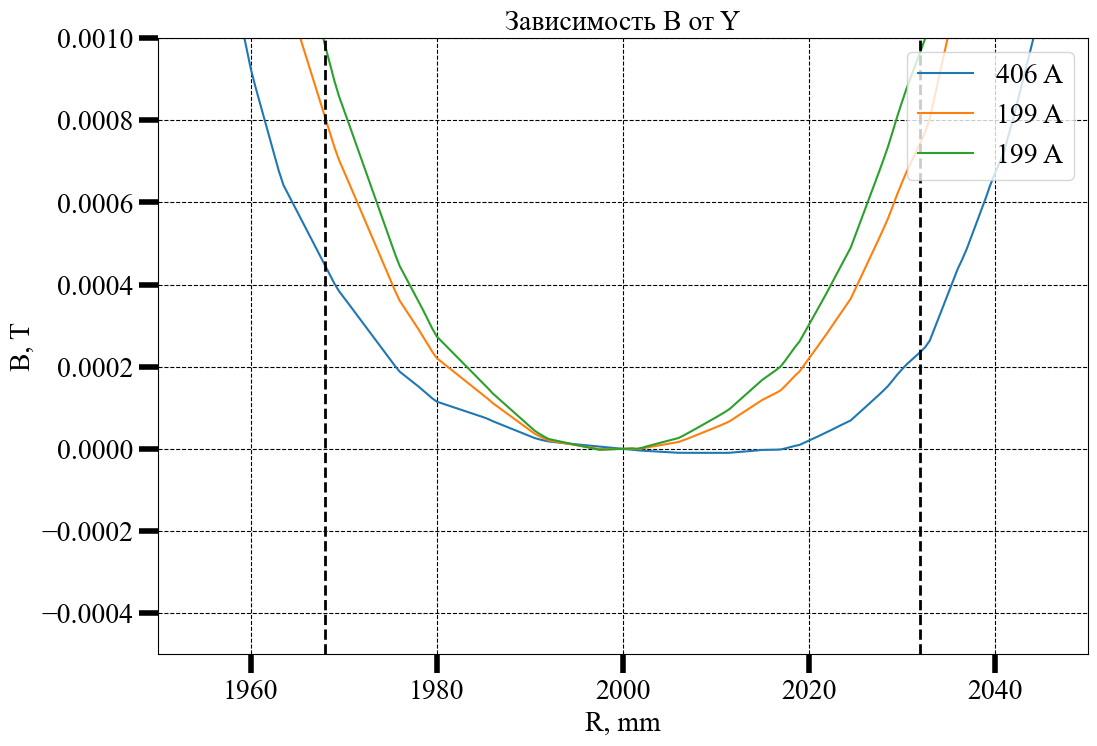

In [176]:
# Создаём figure только один раз перед вызовами функции
plt.figure(figsize=(12, 8))  

def neodnorodnost(data, number):
    df = pd.read_csv(data, skiprows=6, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'B'])
    
    df['B-B2000'] = df['B'] - df.query('y == 2000.0')['B'].values[0]
    df['B-B2000/B'] = df['B-B2000'] / df['B']

    y1 = df['y']
    B1 = df['B-B2000/B']

    plt.plot(y1, B1, label=f'{number} A', linewidth=1.5)  # Добавляем label для легенды

# Добавляем графики
#neodnorodnost('325_m_model_new_ekr_rez.table', 325)
#neodnorodnost('406_m_model_new_ekr_rez.table', 406)
#neodnorodnost('199_m_model_new_ekr_rez.table', 199)
neodnorodnost('C:/Users/User/RABOTA_SKRIPT/406/406_m_model_new_ekr_rez.table', 406)
neodnorodnost('C:/Users/User/RABOTA_SKRIPT/325/325_m_model_new_ekr_rez.table', 199)
neodnorodnost('C:/Users/User/RABOTA_SKRIPT/199/199_m_model_new_ekr_rez.table', 199)

# Оформление
plt.xlabel("R, mm")  
plt.ylabel("B, T")  
plt.title("Зависимость B от Y")  
plt.grid(True, linestyle='--', color='black')
plt.ylim(-0.0005, 0.001)
plt.xlim(1950, 2050)

# Интервалы
intervals = [1968, 2032]
for x in intervals:
    plt.axvline(x=x, linestyle='--', color='black', linewidth=2)

# Легенда собирает все графики
plt.legend(fontsize=20, loc='upper right')

plt.show()

### Распределение магнитного поля вдоль центральной траектории. 

In [177]:
def eff_length_graph(krivaya, priamaya, number):
    df_p = pd.read_csv(priamaya, skiprows=6, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'B']).iloc[1:]
    df_k = pd.read_csv(krivaya, skiprows=6, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'B'])
    df_merged = pd.concat([df_k, df_p], ignore_index=True)
    X_Y_start = 0
    df_merged['X_Y'] = 0.0  # Задаем тип float сразу

    df_merged.loc[0, 'X_Y'] = X_Y_start  # Начальное значение

    for i in range(1, len(df_merged)):
        df_merged.loc[i, 'X_Y'] = np.sqrt((df_merged.loc[i, 'x'] - df_merged.loc[i-1, 'x'])**2 + 
                                          (df_merged.loc[i, 'y'] - df_merged.loc[i-1, 'y'])**2) + df_merged.loc[i-1, 'X_Y']
    
    df_merged['area'] = ((df_merged['X_Y'].shift(-1) - df_merged['X_Y']) 
                         * (df_merged['B'].shift(-1) + df_merged['B']) / 2).shift(1).fillna(0)
    
    sum_area = df_merged.area.sum()
    print(f'sum_area = {sum_area}')
    Leff = sum_area/(df_merged.B.max())*2
    print(f'L_eff = {Leff}')
    Reff = Leff * 180 / (np.pi * 40)
    print(f'R_eff = {Reff}')
    Reff_ideal = 2000
    print(f'R_eff_ideal = {Reff_ideal}')
    Leff_ideal =Reff_ideal*(np.pi)*40/180
    print(f'L_eff_ideal = {Leff_ideal}')
    delta = (Reff/Reff_ideal)*100 -100
    print(f'delta = {delta}')

    
    plt.figure(figsize=(12, 8))
    L = df_merged['X_Y']  
    B = df_merged['B'] 


    plt.plot(L, B, label=f'{number} A', color='red', linewidth=1.5)

    plt.xlabel("L, mm")  
    plt.ylabel("B, T")  
    #plt.title(f'Зависимость B от L {number} A')
    plt.legend(fontsize=20, loc='upper right')
    
    X_value = df_merged.loc[500].X_Y     # Координата X, где будет линия
    Y_min, Y_max = 0, df_merged.B.max()  # Ограничения по Y

    plt.plot([X_value, X_value], [Y_min, Y_max], linestyle='--', color='black', linewidth=2, label="Линия от Y_min до Y_max") 
    
    Y_value = Y_max
    X_min, X_max = 0, df_merged.loc[500].X_Y
    
    # Сетка
    plt.grid(True, linestyle='--', color='black')
    
    
    plt.plot([X_min, X_max], [Y_value, Y_value], linestyle='--', color='black', linewidth=2, label="Линия от X_min до X_max")

    plt.show()
    
    return df_merged

### Эффективные длины поворотного магнита ТМ1 при разных 3 вариантах тока, подаваемого на катушки

sum_area = 905.6519864591056
L_eff = 1381.4817703370845
R_eff = 1978.8268728644057
R_eff_ideal = 2000
L_eff_ideal = 1396.2634015954634
delta = -1.0586563567797214


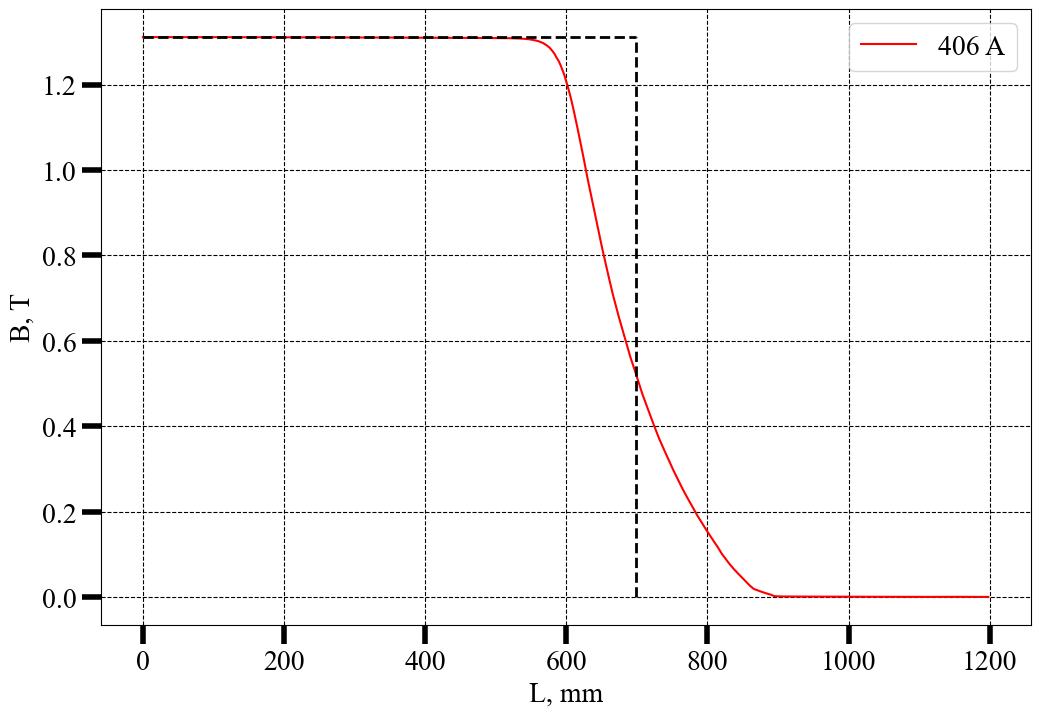

x            y    z         B          X_Y      area
0        0.000000  2000.000000  0.0  1.311126     0.000000  0.000000
1        1.396263  1999.999513  0.0  1.311128     1.396263  1.830678
2        2.792525  1999.998050  0.0  1.311129     2.792526  1.830680
3        4.188786  1999.995614  0.0  1.311131     4.188789  1.830682
4        5.585045  1999.992202  0.0  1.311131     5.585052  1.830684
...           ...          ...  ...       ...          ...       ...
996   1150.128224  1709.743080  0.0  0.000507  1194.132118  0.000510
997   1151.067918  1709.401060  0.0  0.000499  1195.132120  0.000503
998   1152.007612  1709.059040  0.0  0.000492  1196.132121  0.000495
999   1152.947306  1708.717020  0.0  0.000484  1197.132122  0.000488
1000  1153.887000  1708.375000  0.0  0.000477  1198.132123  0.000480

[1001 rows x 6 columns]

In [178]:
kr_406 = 'C:/Users/User/RABOTA_SKRIPT/406/406_m_model_new_ekr_kriv.table'
pr_406 = 'C:/Users/User/RABOTA_SKRIPT/406/406_m_model_new_ekr_priam.table'
#'C:/Users/User/RABOTA_SKRIPT/406/406_m_model_new_ekr_kriv.table'

eff_length_graph(kr_406, pr_406, 406)

sum_area = 784.7873750331663
L_eff = 1381.4784107545242
R_eff = 1978.8220606168647
R_eff_ideal = 2000
L_eff_ideal = 1396.2634015954634
delta = -1.0588969691567627


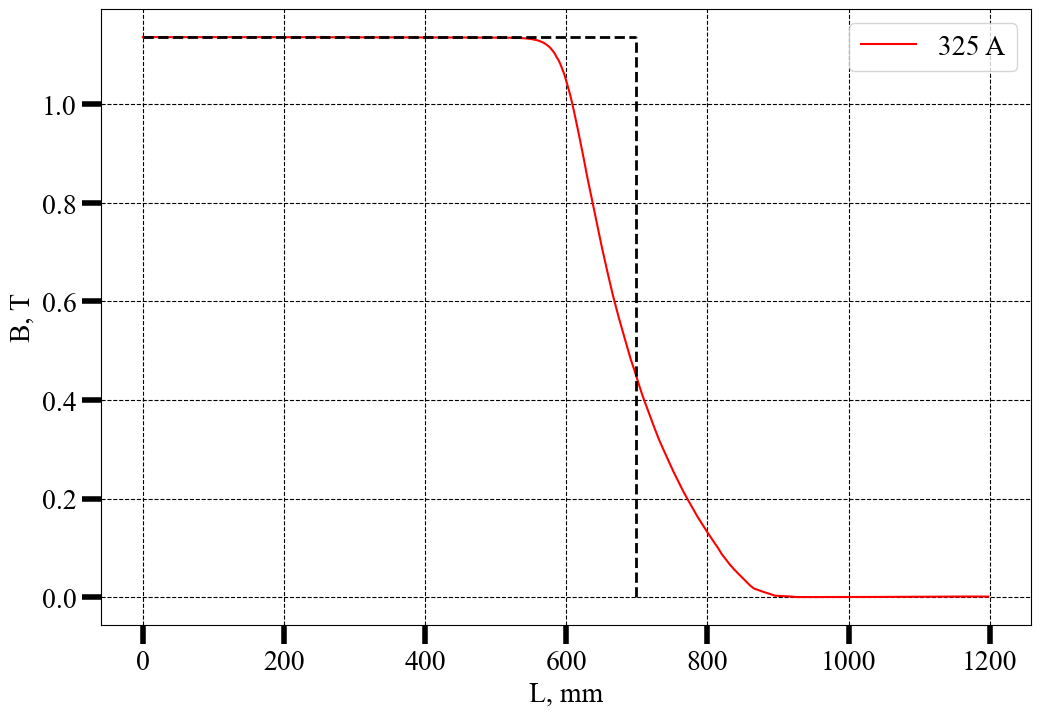

x            y    z         B          X_Y      area
0        0.000000  2000.000000  0.0  1.136152     0.000000  0.000000
1        1.396263  1999.999513  0.0  1.136153     1.396263  1.586367
2        2.792525  1999.998050  0.0  1.136153     2.792526  1.586368
3        4.188786  1999.995614  0.0  1.136156     4.188789  1.586371
4        5.585045  1999.992202  0.0  1.136155     5.585052  1.586372
...           ...          ...  ...       ...          ...       ...
996   1150.128224  1709.743080  0.0  0.001187  1194.132118  0.001190
997   1151.067918  1709.401060  0.0  0.001182  1195.132120  0.001185
998   1152.007612  1709.059040  0.0  0.001177  1196.132121  0.001179
999   1152.947306  1708.717020  0.0  0.001171  1197.132122  0.001174
1000  1153.887000  1708.375000  0.0  0.001166  1198.132123  0.001169

[1001 rows x 6 columns]

In [179]:
kr_325 = 'C:/Users/User/RABOTA_SKRIPT/325/325_m_model_new_ekr_kriv.table'
pr_325 = 'C:/Users/User/RABOTA_SKRIPT/325/325_m_model_new_ekr_priam.table'

eff_length_graph(kr_325, pr_325, 325)

sum_area = 498.5753821769974
L_eff = 1381.913635561446
R_eff = 1979.445474231265
R_eff_ideal = 2000
L_eff_ideal = 1396.2634015954634
delta = -1.027726288436753


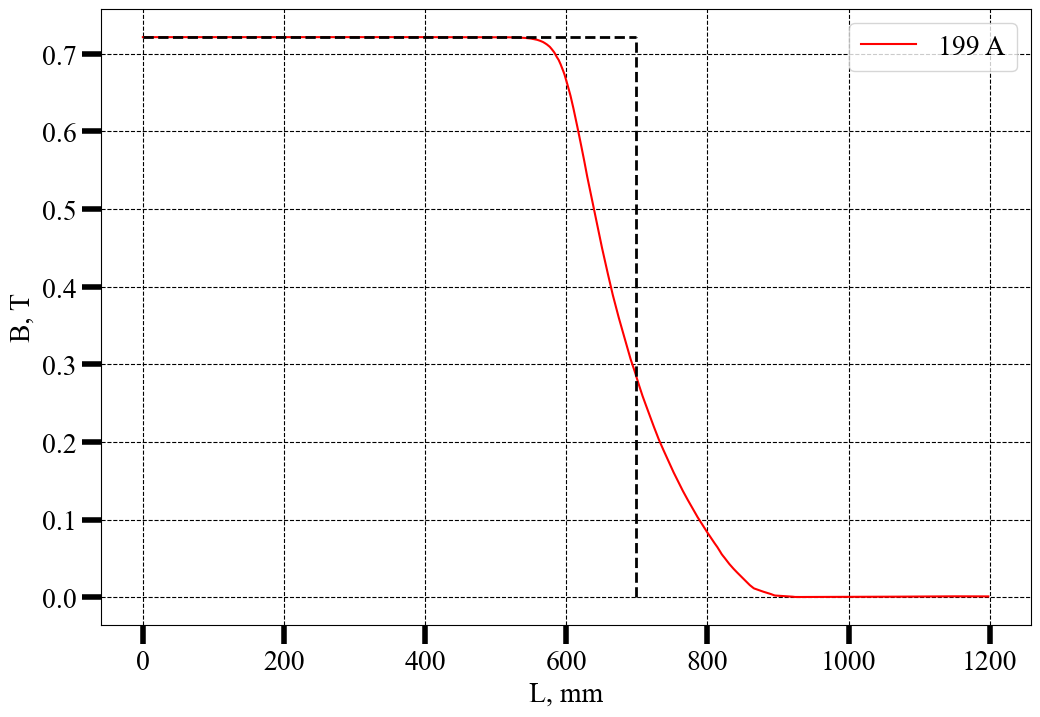

x            y    z         B          X_Y      area
0        0.000000  2000.000000  0.0  0.721551     0.000000  0.000000
1        1.396263  1999.999513  0.0  0.721551     1.396263  1.007475
2        2.792525  1999.998050  0.0  0.721552     2.792526  1.007476
3        4.188786  1999.995614  0.0  0.721554     4.188789  1.007478
4        5.585045  1999.992202  0.0  0.721553     5.585052  1.007478
...           ...          ...  ...       ...          ...       ...
996   1150.128224  1709.743080  0.0  0.000969  1194.132118  0.000971
997   1151.067918  1709.401060  0.0  0.000966  1195.132120  0.000968
998   1152.007612  1709.059040  0.0  0.000963  1196.132121  0.000964
999   1152.947306  1708.717020  0.0  0.000960  1197.132122  0.000961
1000  1153.887000  1708.375000  0.0  0.000956  1198.132123  0.000958

[1001 rows x 6 columns]

In [180]:
kr_199 = 'C:/Users/User/RABOTA_SKRIPT/199/199_m_model_new_ekr_kriv.table'
pr_199 = 'C:/Users/User/RABOTA_SKRIPT/199/199_m_model_new_ekr_priam.table'

eff_length_graph(kr_199, pr_199, 199)

### Радиальное распределение магнитной индукции в поворотном магните

In [181]:
center_rezalt = 'C:/Users/User/RABOTA_SKRIPT/199/199_m_model_new_ekr_rez.table'
def radialnoe_raspredelenie(center_rezalt, tok, R_povorota, polyrazmer_goriz):
    df_center_rezalt = pd.read_csv(center_rezalt, skiprows=6, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'B'])

    plt.figure(figsize=(12, 8))  
    #=========================
    y = df_center_rezalt['y']  
    B = df_center_rezalt['B'] 

    plt.plot(y, B, color='red', linewidth=1.5)

    plt.xlabel("R, mm")  
    plt.ylabel("B, T")  
    plt.title("Радиальное распределение магнитной индукции")  
    plt.grid(True, linestyle='--', color='black')
    plt.legend([f'{tok} A'], fontsize=20, loc = 'upper right')

    intervals = [R_povorota - polyrazmer_goriz, R_povorota + polyrazmer_goriz]
    for x in intervals:
        plt.axvline(x=x, linestyle='--', color='black', linewidth=2)
    plt.show()

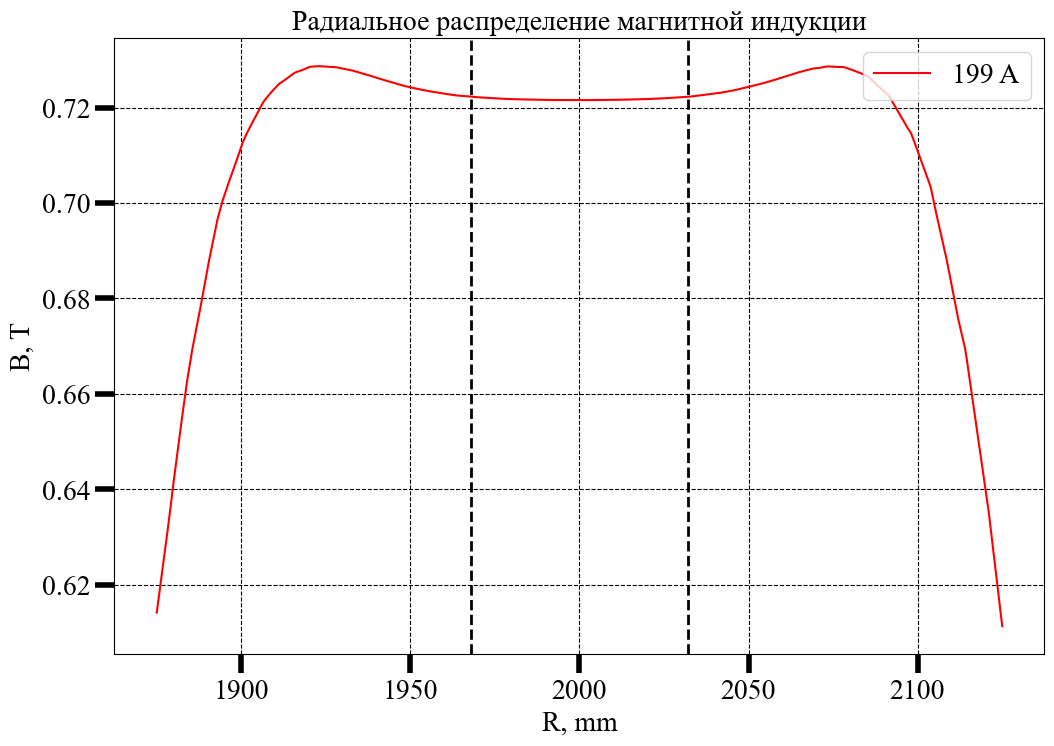

In [182]:
center_rezalt = 'C:/Users/User/RABOTA_SKRIPT/199/199_m_model_new_ekr_rez.table'
tok = 199
R_povorota = 2000
polyrazmer_goriz = 32
radialnoe_raspredelenie(center_rezalt, tok, R_povorota, polyrazmer_goriz)

### Кривая возбуждения поворотного магнита

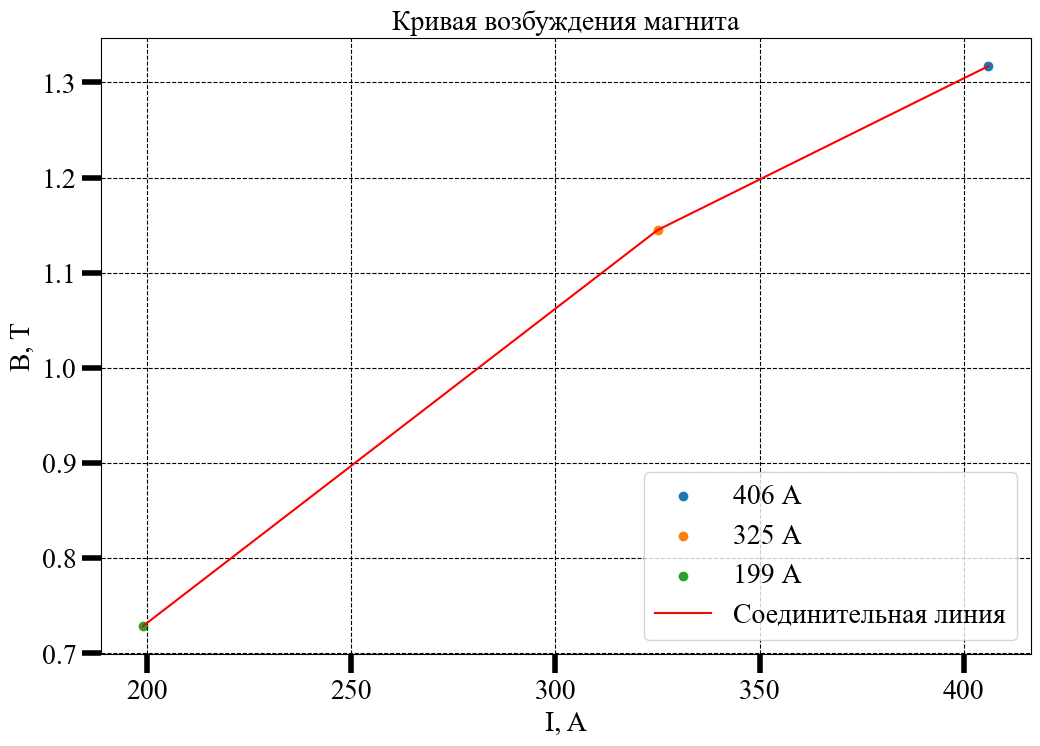

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

def krivaya_vozbuzhdenia(dannie, tok):
    df = pd.read_csv(dannie, skiprows=6, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'B'])
    max_B = df['B'].max()
    plt.scatter(tok, max_B, label=f"{tok} А")
    return tok, max_B  # Возвращаем значения тока и поля

# Получаем данные из каждого файла
tok1, max_B1 = krivaya_vozbuzhdenia('C:/Users/User/RABOTA_SKRIPT/406/406_m_model_new_ekr_rez.table', 406)
tok2, max_B2 = krivaya_vozbuzhdenia('C:/Users/User/RABOTA_SKRIPT/325/325_m_model_new_ekr_rez.table', 325)
tok3, max_B3 = krivaya_vozbuzhdenia('C:/Users/User/RABOTA_SKRIPT/199/199_m_model_new_ekr_rez.table', 199)

# Соединяем точки линией
plt.plot([tok1, tok2, tok3], [max_B1, max_B2, max_B3], linestyle='-', color='red', linewidth=1.5, label='Соединительная линия') # Добавлена линия

plt.xlabel("I, A")
plt.ylabel("B, T")
plt.title("Кривая возбуждения магнита")
plt.grid(True, linestyle='--', color='black')
plt.legend( fontsize=20, loc = 'lower right') # Добавлена легенда

plt.show()

### Зависимости x,y,z по Bx,By,Bz (карта поля (разбор с продольной составляющей магнитного поля))

In [184]:
def plot_magnetic_fields_all(file_kriv, file_priam, coordinate, color='red', linewidth=1.5):

    # Загрузка данных из файлов
    df_all_kriv = pd.read_csv(file_kriv, skiprows=8, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'Bx', 'By', 'Bz'])
    df_all_priam = pd.read_csv(file_priam, skiprows=8, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'Bx', 'By', 'Bz']).iloc[1:]

    # Объединение данных
    df_merged_po_traektorii = pd.concat([df_all_kriv, df_all_priam], ignore_index=True)

    # Построение графиков
    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_po_traektorii[coordinate], df_merged_po_traektorii['Bx'], color=color, linewidth=linewidth)
    plt.xlabel(f"{coordinate}, мм")
    plt.ylabel("Bx, Тл")
    plt.title(f"Bx от {coordinate}")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_po_traektorii[coordinate], df_merged_po_traektorii['By'], color=color, linewidth=linewidth)
    plt.xlabel(f"{coordinate}, мм")
    plt.ylabel("By, Тл")
    plt.title(f"By от {coordinate}")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_po_traektorii[coordinate], df_merged_po_traektorii['Bz'], color=color, linewidth=linewidth)
    plt.xlabel(f"{coordinate}, мм")
    plt.ylabel("Bz, Тл")
    plt.title(f"Bz от {coordinate}")
    plt.grid(True)
    plt.show()

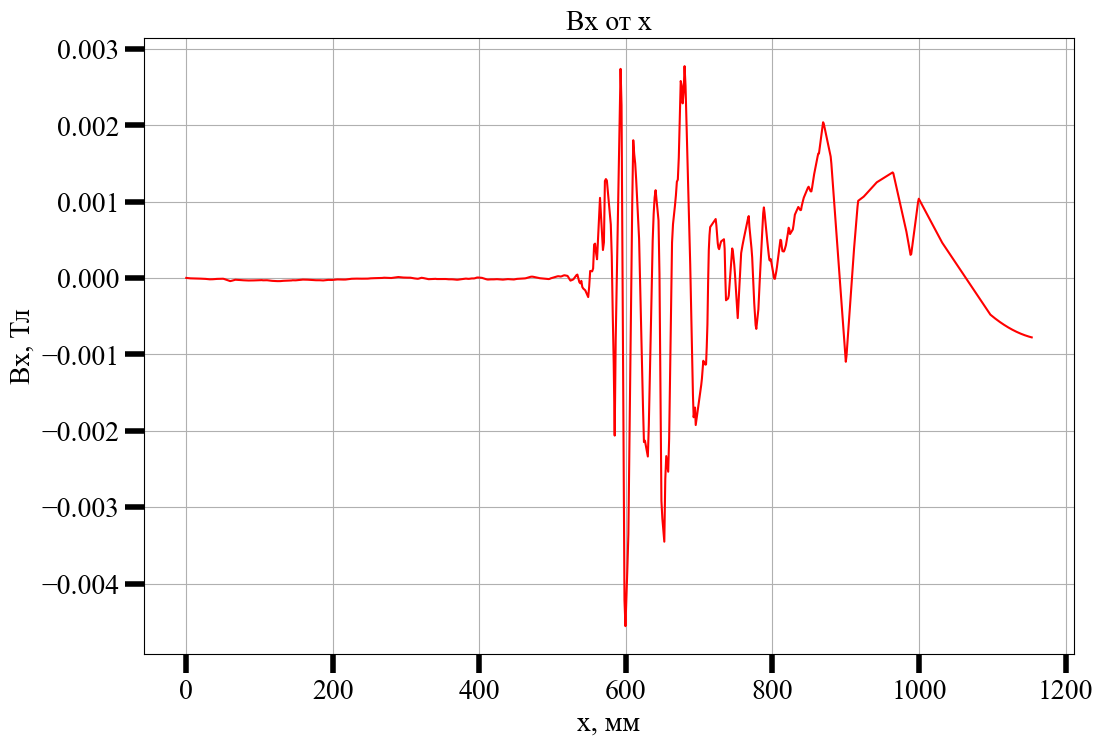

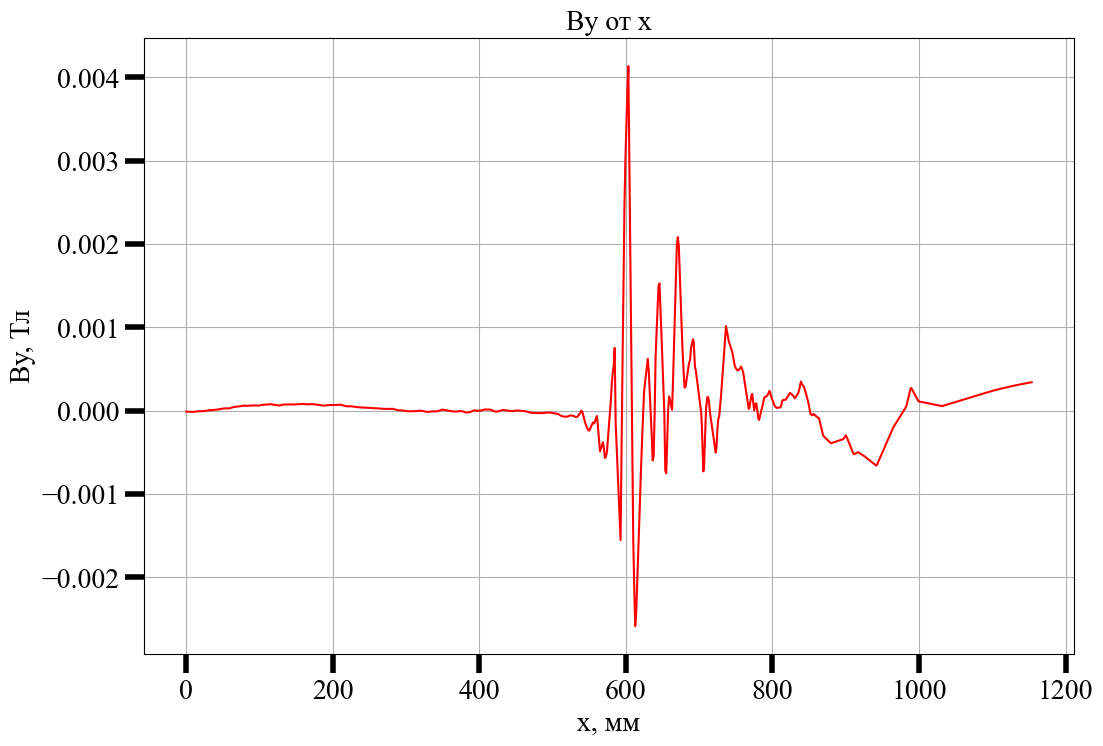

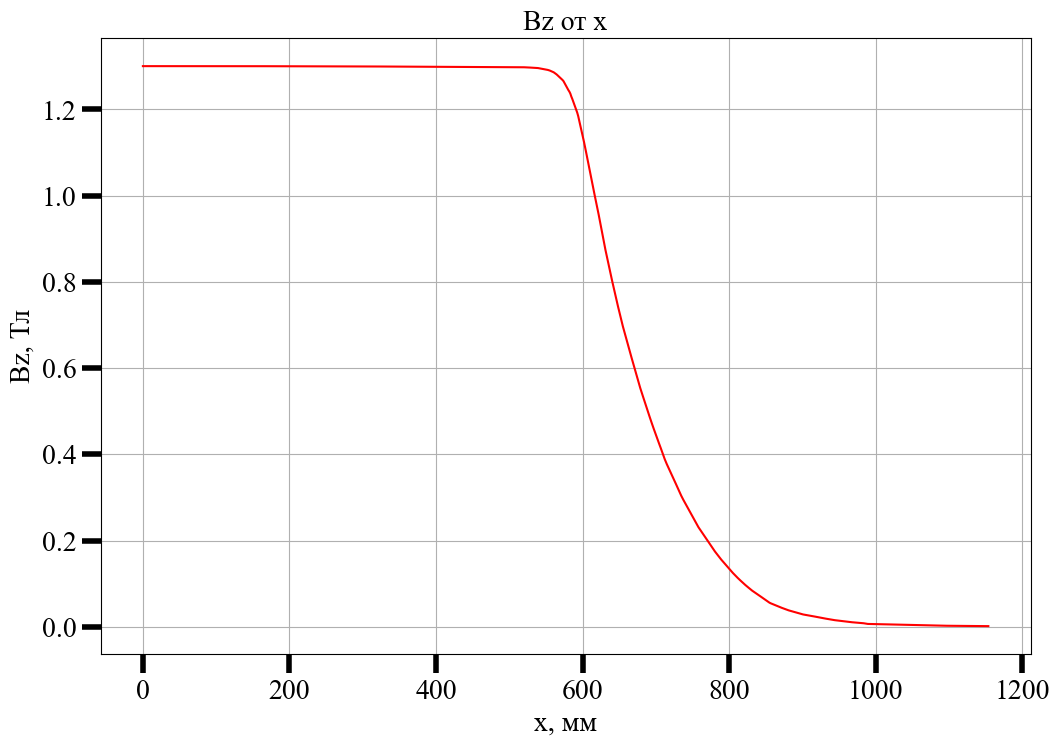

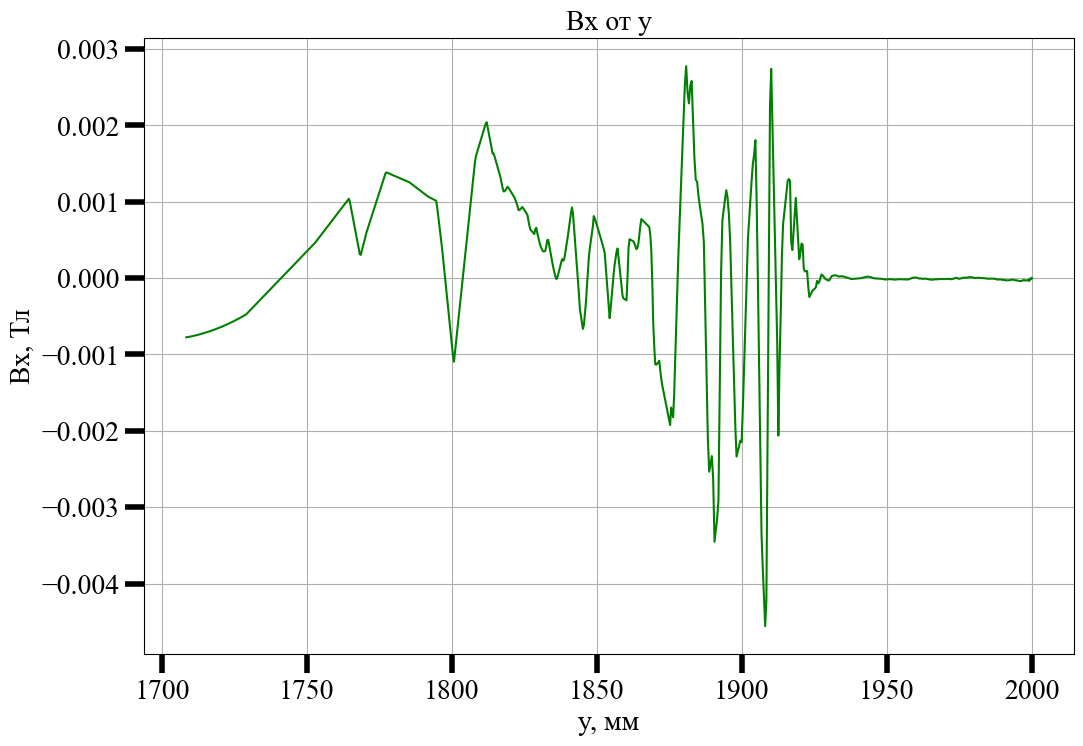

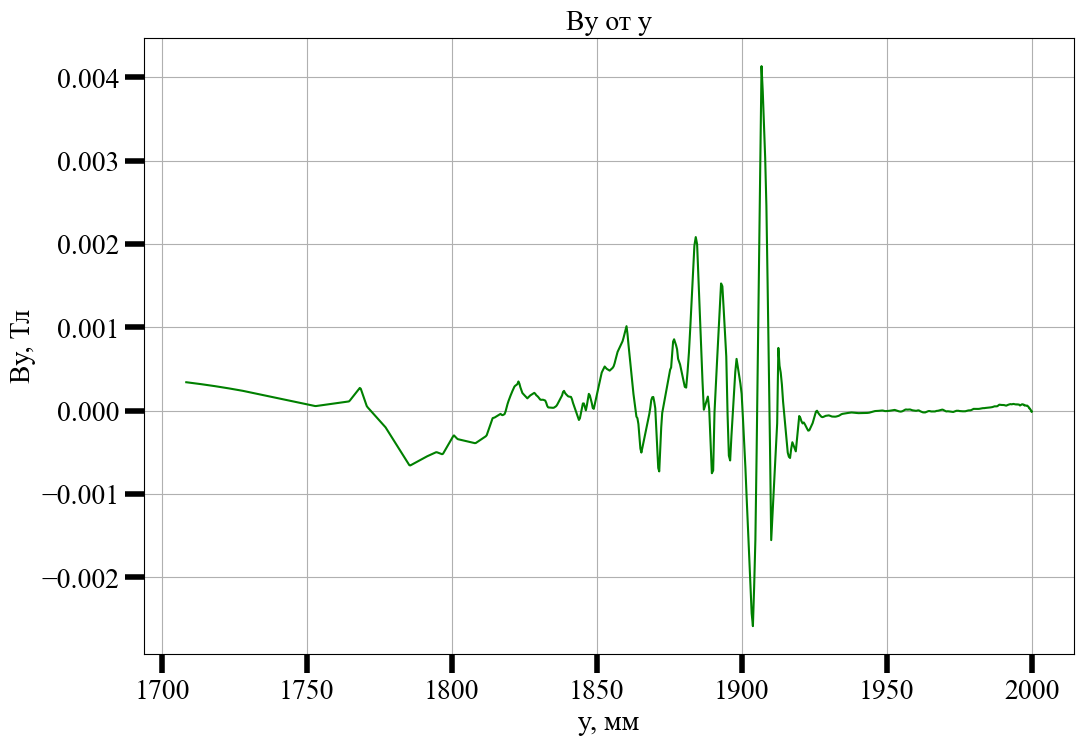

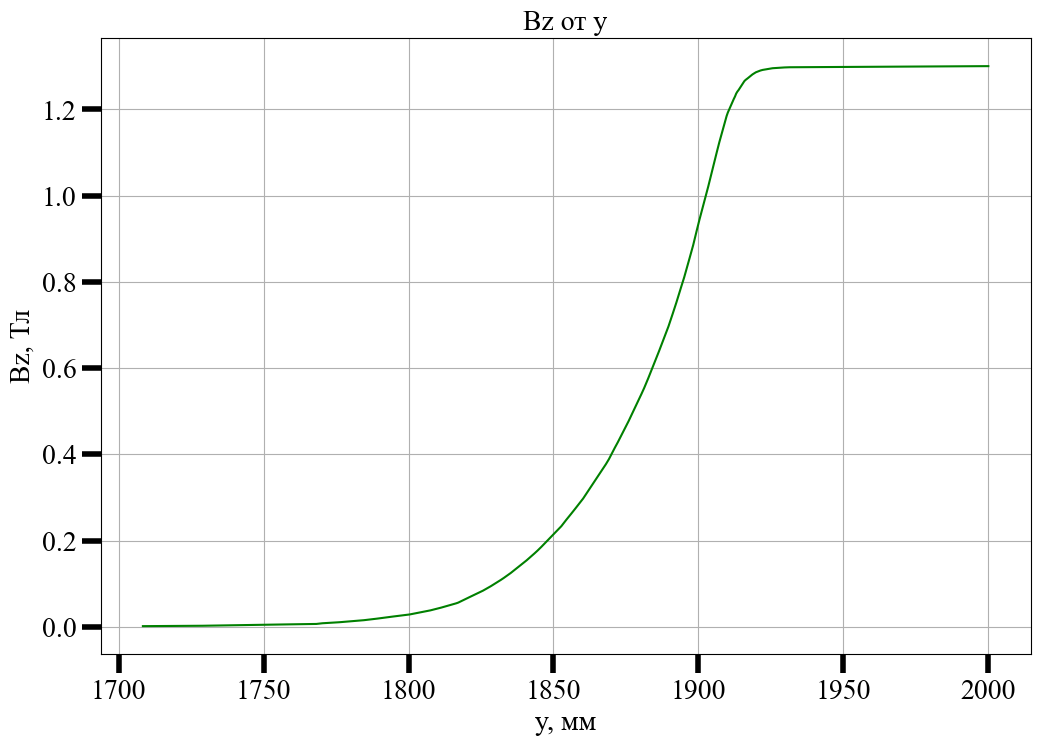

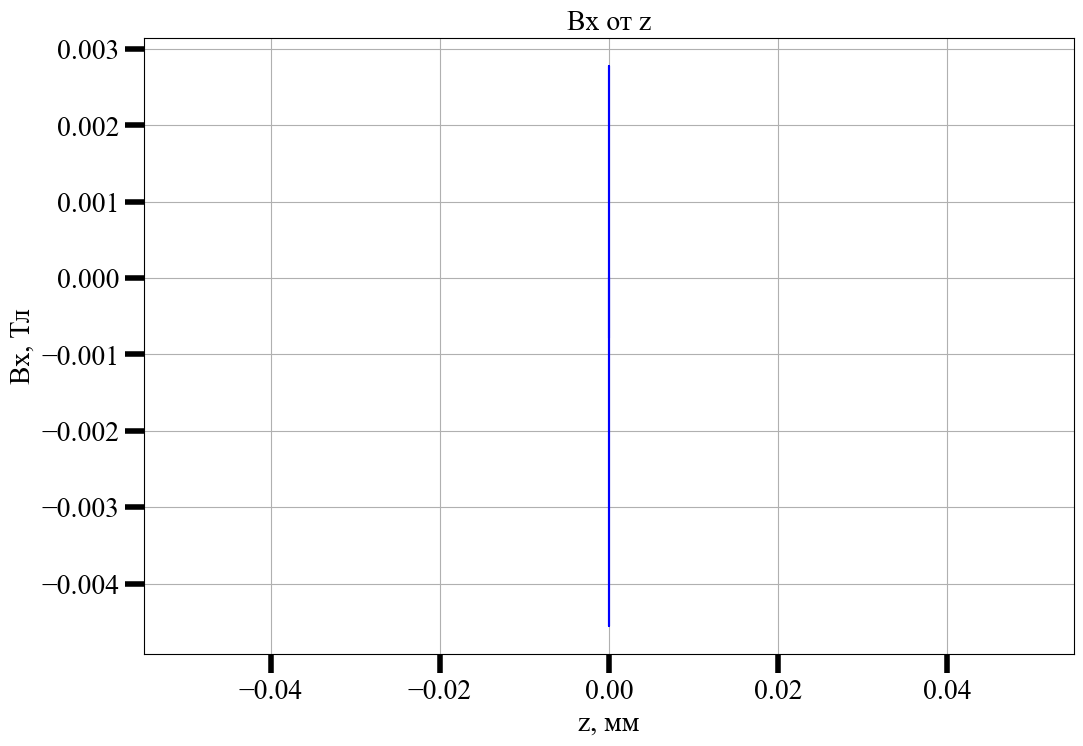

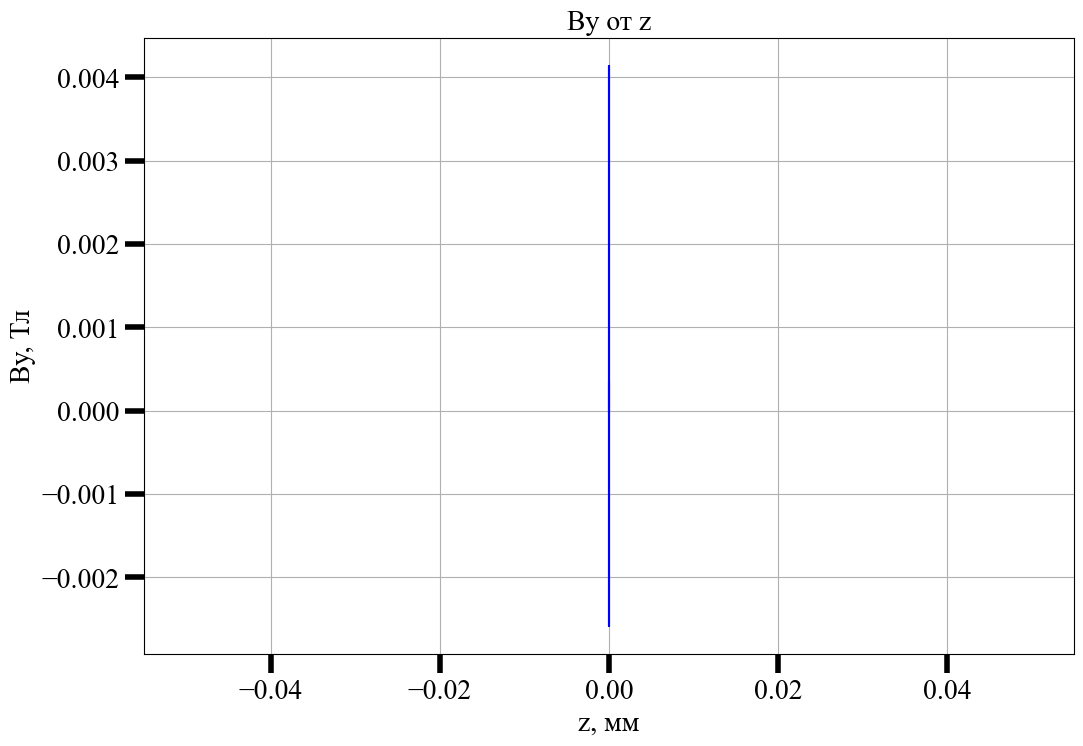

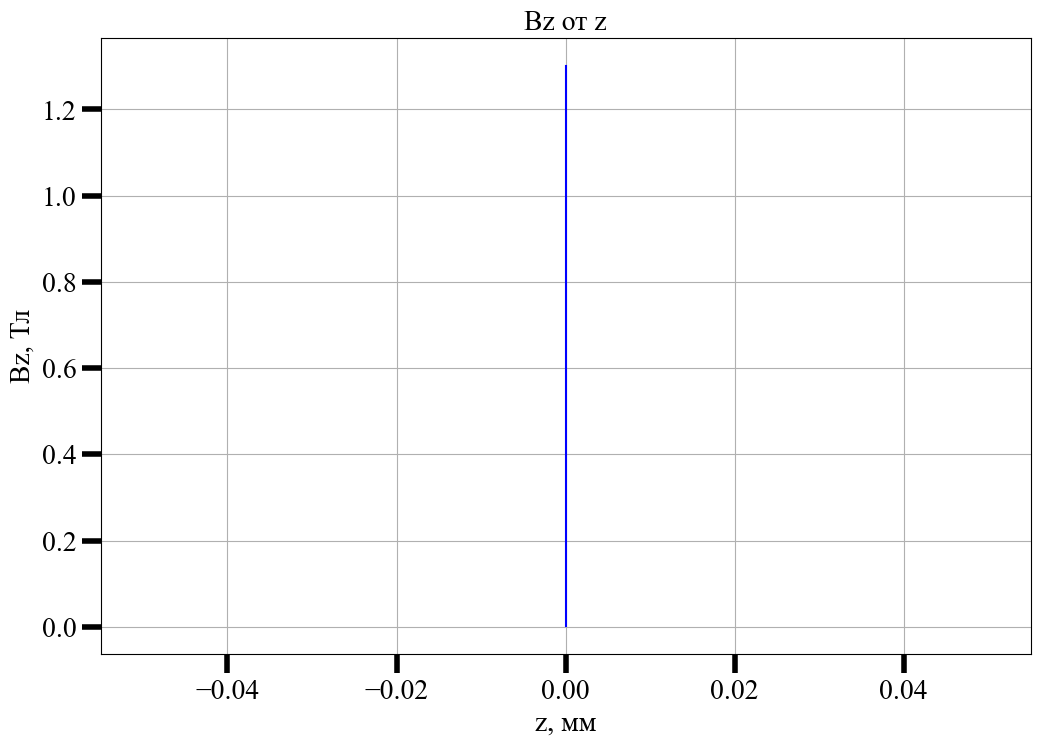

In [185]:
plot_magnetic_fields_all(
    file_kriv='C:/Users/User/RABOTA_SKRIPT/405.2_bez_ekr/vse_kriv.table',
    file_priam='C:/Users/User/RABOTA_SKRIPT/405.2_bez_ekr/vse_priam.table',
    coordinate='x',  # Или 'y' или 'z'
    color='red',    # Цвет линии
    linewidth=1.5   # Толщина линии
)

plot_magnetic_fields_all(
    file_kriv='C:/Users/User/RABOTA_SKRIPT/405.2_bez_ekr/vse_kriv.table',
    file_priam='C:/Users/User/RABOTA_SKRIPT/405.2_bez_ekr/vse_priam.table',
    coordinate='y',  # Или 'y' или 'z'
    color='green',    # Цвет линии
    linewidth=1.5   # Толщина линии
)

plot_magnetic_fields_all(
    file_kriv='C:/Users/User/RABOTA_SKRIPT/405.2_bez_ekr/vse_kriv.table',
    file_priam='C:/Users/User/RABOTA_SKRIPT/405.2_bez_ekr/vse_priam.table',
    coordinate='z',  # Или 'y' или 'z'
    color='blue',    # Цвет линии
    linewidth=1.5   # Толщина линии
)

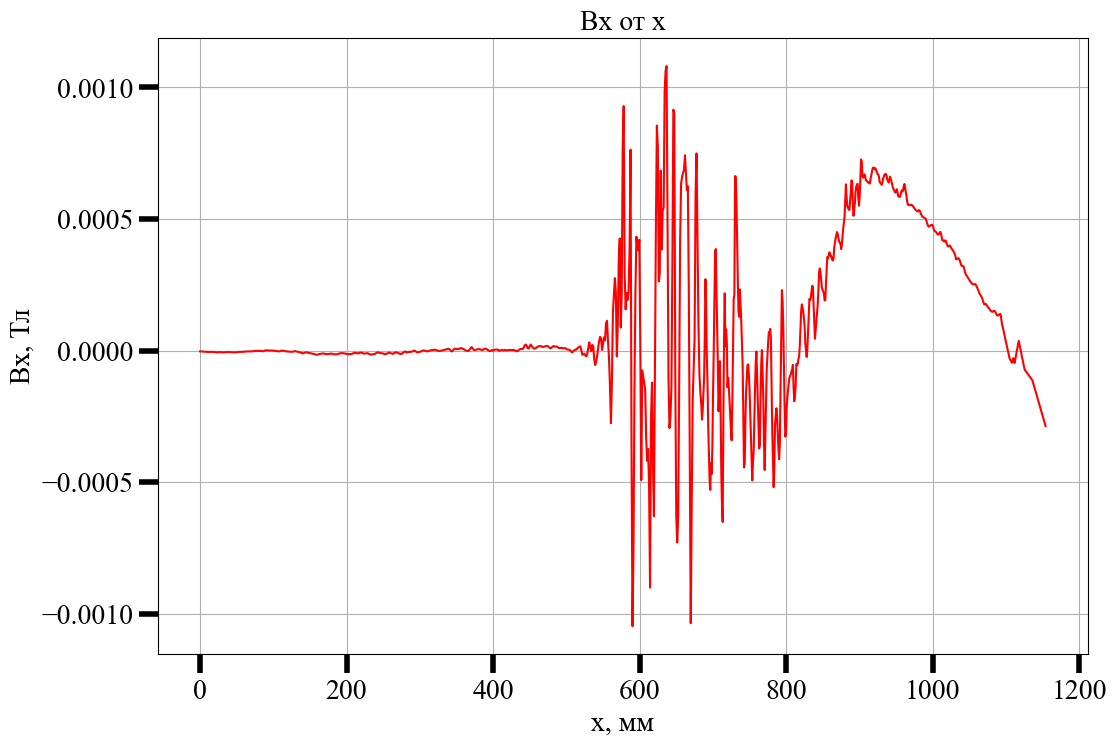

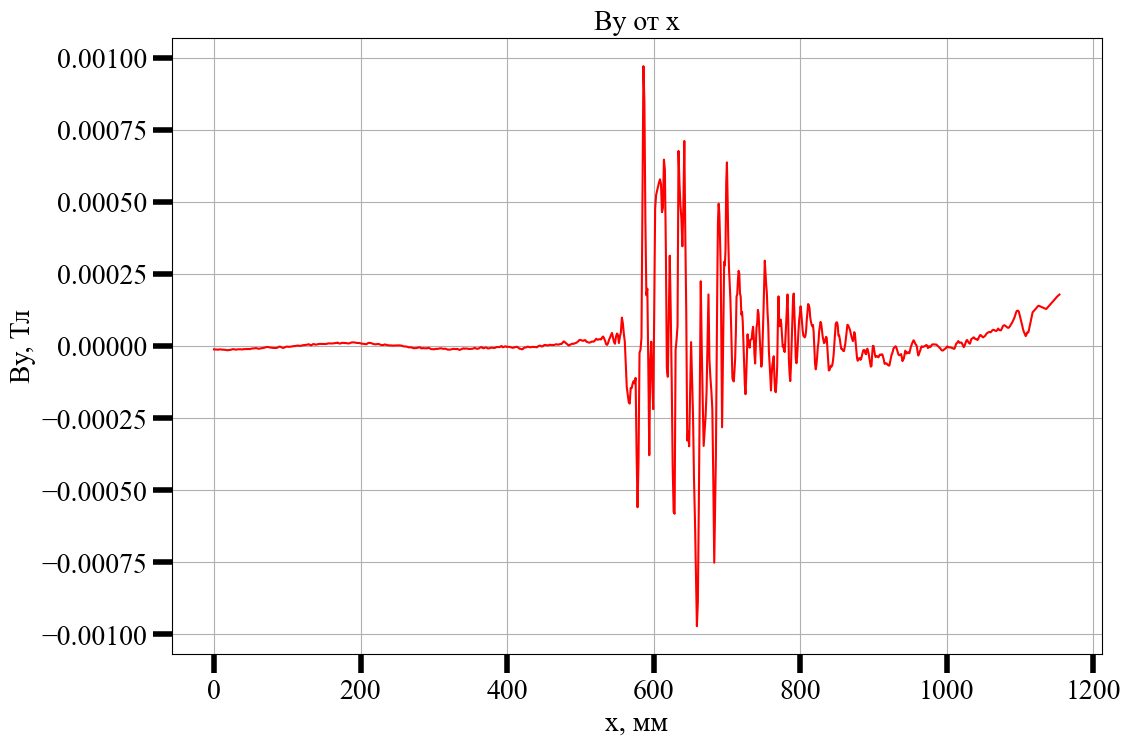

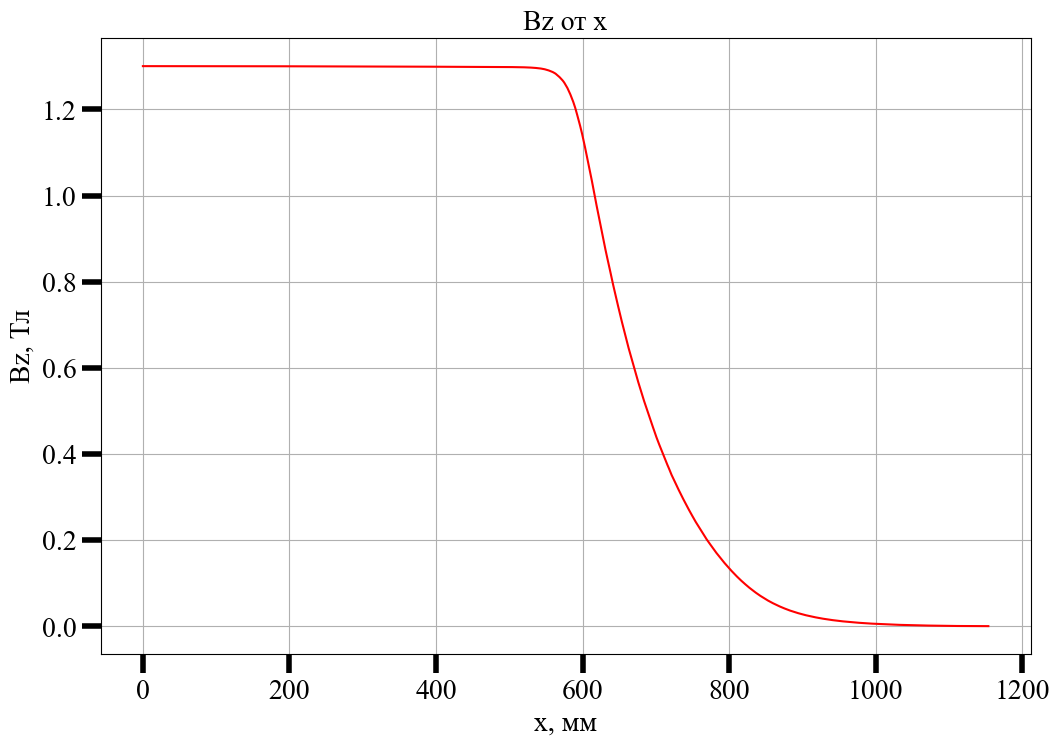

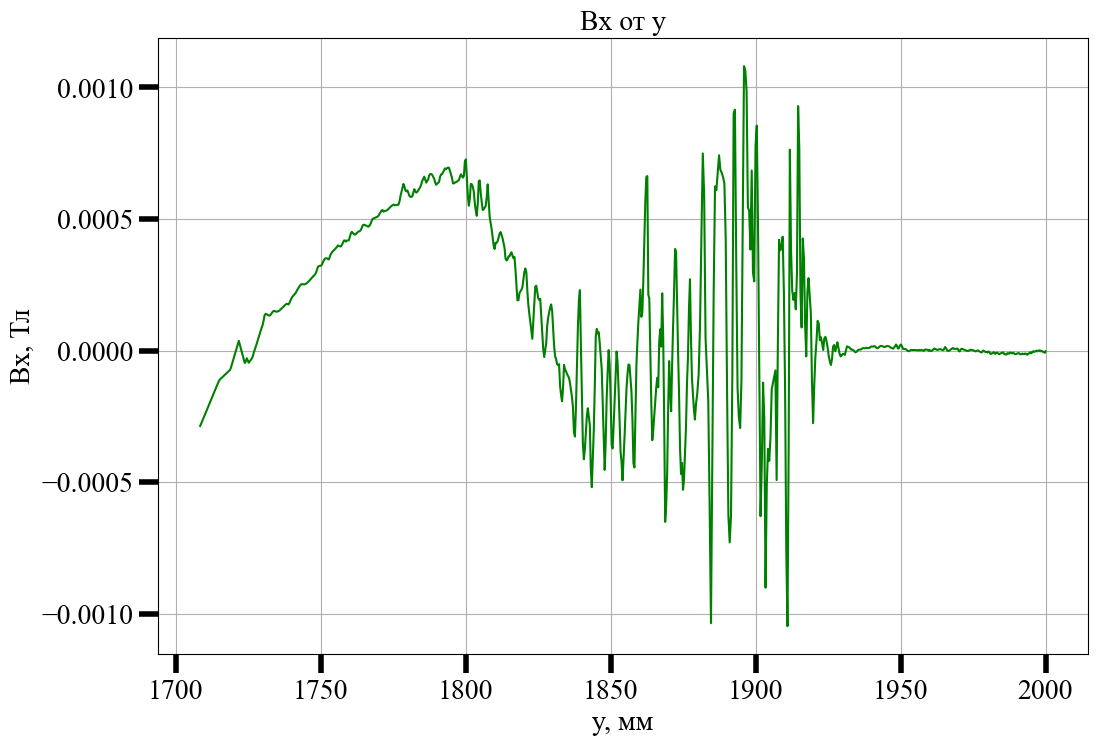

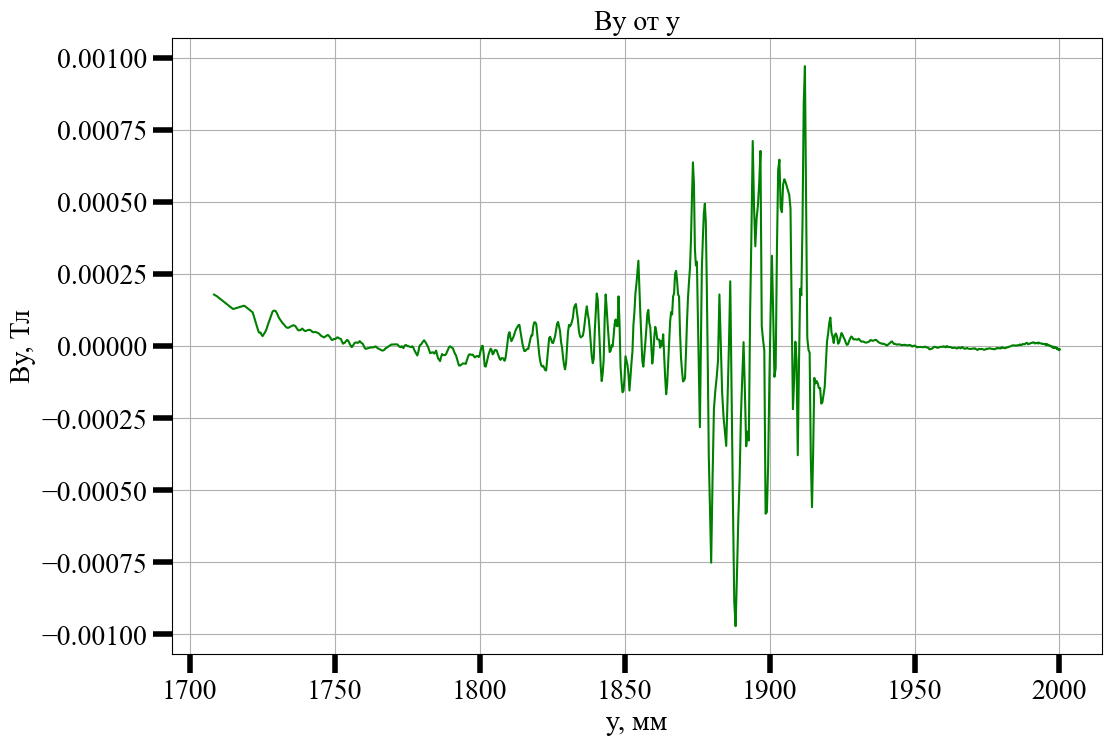

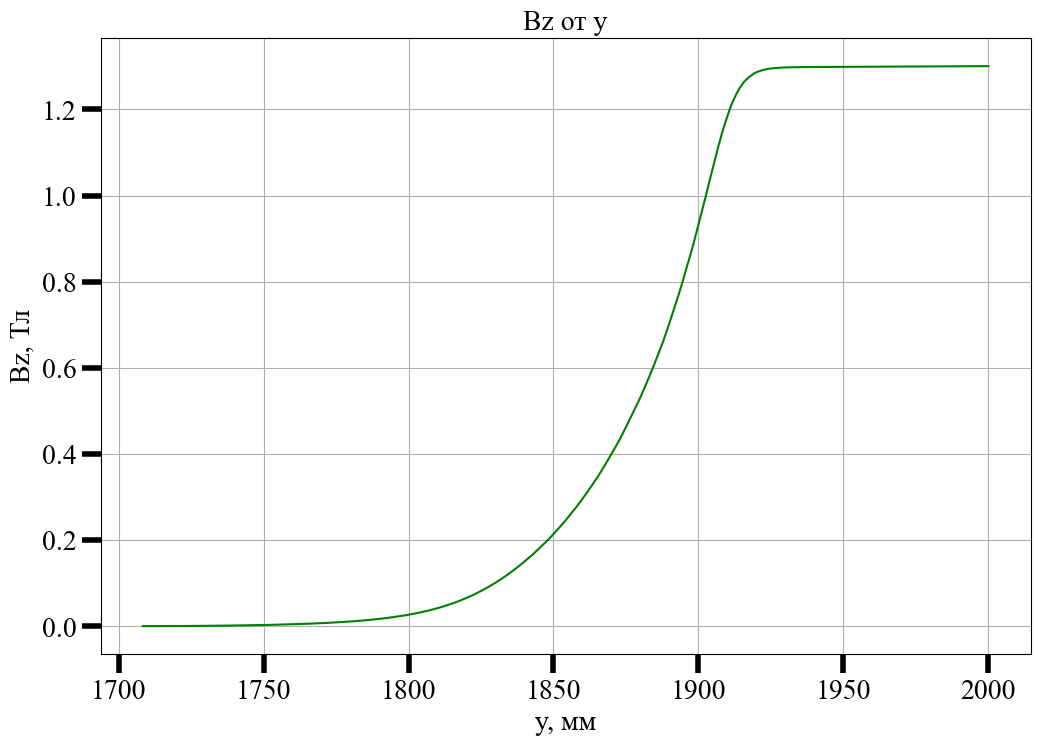

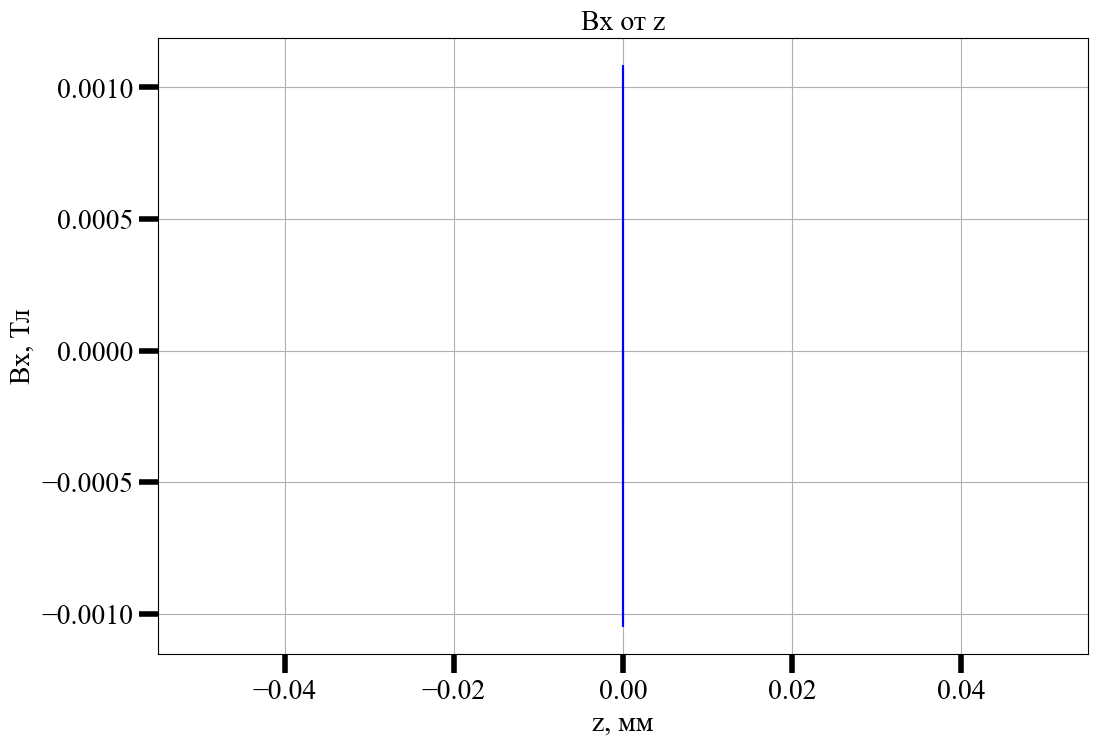

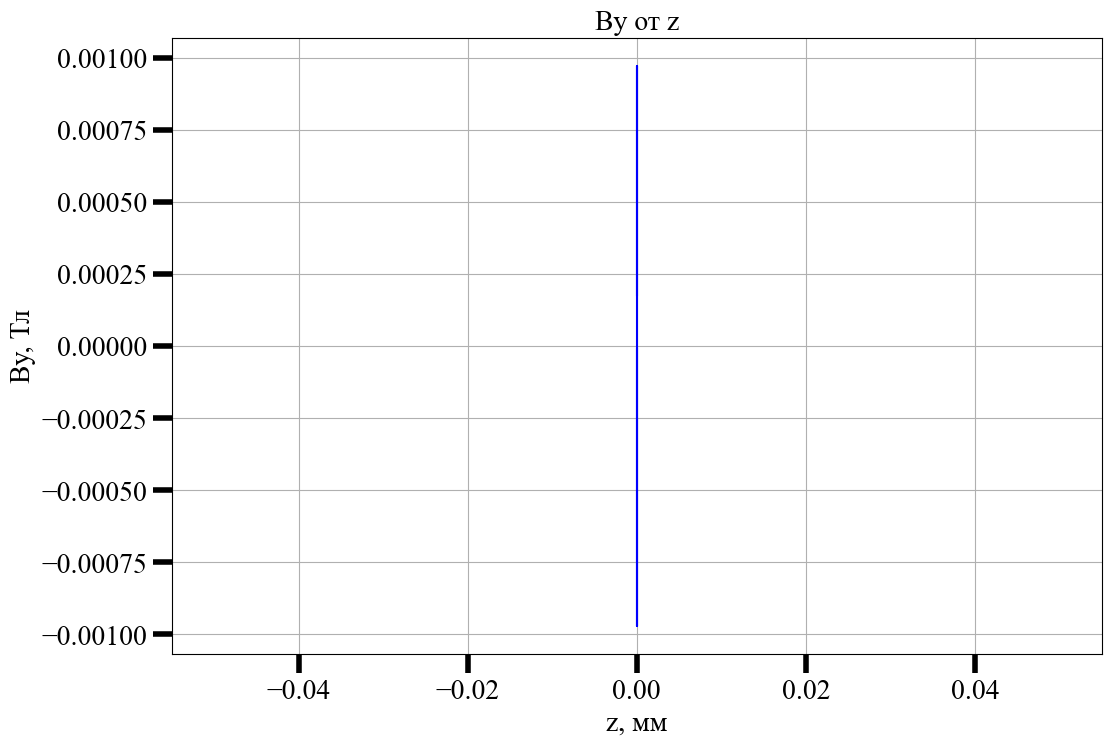

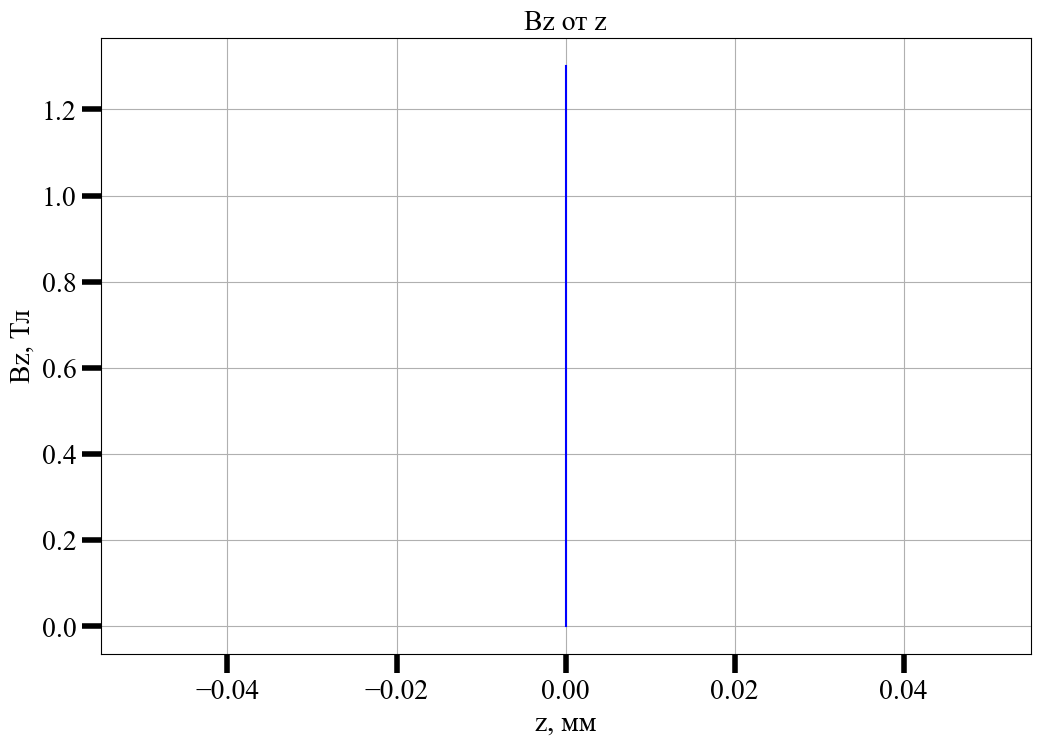

In [187]:
plot_magnetic_fields_all(
    file_kriv='406_m_model_2_magnets_SP184_and_TM1_kriv.table',
    file_priam='406_m_model_2_magnets_SP184_and_TM1_priam.table',
    coordinate='x',  # Или 'y' или 'z'
    color='red',    # Цвет линии
    linewidth=1.5   # Толщина линии
)

plot_magnetic_fields_all(
    file_kriv='406_m_model_2_magnets_SP184_and_TM1_kriv.table',
    file_priam='406_m_model_2_magnets_SP184_and_TM1_priam.table',
    coordinate='y',  # Или 'y' или 'z'
    color='green',    # Цвет линии
    linewidth=1.5   # Толщина линии
)

plot_magnetic_fields_all(
    file_kriv='406_m_model_2_magnets_SP184_and_TM1_kriv.table',
    file_priam='406_m_model_2_magnets_SP184_and_TM1_priam.table',
    coordinate='z',  # Или 'y' или 'z'
    color='blue',    # Цвет линии
    linewidth=1.5   # Толщина линии
)

### Пределы по радиальному и тангенциальному распеределниям магнитного поля ппри расчете магнита ТМ1

In [188]:
def hta_TM_(file_kriv, file_priam, color='red', linewidth=1.5):

    # Загрузка данных из файлов
    df_all_kriv = pd.read_csv(file_kriv, skiprows=8, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'Bx', 'By', 'Bz'])
    df_all_priam = pd.read_csv(file_priam, skiprows=8, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'Bx', 'By', 'Bz']).iloc[1:]

    # Объединение данных
    df_merged_po_traektorii = pd.concat([df_all_kriv, df_all_priam], ignore_index=True)
    return df_merged_po_traektorii

In [189]:
file_kriv='406_m_model_2_magnets_SP184_and_TM1_kriv.table'
file_priam='406_m_model_2_magnets_SP184_and_TM1_priam.table'

hta_TM_(file_kriv, file_priam)

x            y    z        Bx        By        Bz
0        0.000000  2000.000000  0.0 -0.000003 -0.000011  1.300391
1        1.396263  1999.999513  0.0 -0.000003 -0.000011  1.300390
2        2.792525  1999.998050  0.0 -0.000004 -0.000011  1.300390
3        4.188786  1999.995614  0.0 -0.000004 -0.000012  1.300390
4        5.585045  1999.992202  0.0 -0.000004 -0.000012  1.300390
...           ...          ...  ...       ...       ...       ...
996   1150.128224  1709.743080  0.0 -0.000251  0.000171  0.000686
997   1151.067918  1709.401060  0.0 -0.000261  0.000173  0.000680
998   1152.007612  1709.059040  0.0 -0.000269  0.000175  0.000675
999   1152.947306  1708.717020  0.0 -0.000278  0.000177  0.000670
1000  1153.887000  1708.375000  0.0 -0.000287  0.000179  0.000665

[1001 rows x 6 columns]

In [190]:
file_krivaayaaa = pd.read_csv('406_m_model_2_magnets_SP184_and_TM1_kriv.table', skiprows=8, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'Bx', 'By', 'Bz'])
file_krivaayaaa

x            y    z        Bx        By        Bz
0      0.000000  2000.000000  0.0 -0.000003 -0.000011  1.300391
1      1.396263  1999.999513  0.0 -0.000003 -0.000011  1.300390
2      2.792525  1999.998050  0.0 -0.000004 -0.000011  1.300390
3      4.188786  1999.995614  0.0 -0.000004 -0.000012  1.300390
4      5.585045  1999.992202  0.0 -0.000004 -0.000012  1.300390
..          ...          ...  ...       ...       ...       ...
496  678.789218  1881.288175  0.0  0.000440 -0.000155  0.551937
497  680.102439  1880.813832  0.0  0.000102 -0.000218  0.544607
498  681.415329  1880.338573  0.0 -0.000088 -0.000460  0.537214
499  682.727886  1879.862397  0.0 -0.000161 -0.000751  0.529925
500  684.040000  1879.385000  0.0 -0.000207 -0.000538  0.523243

[501 rows x 6 columns]

In [191]:
def create_ygol_column(df):
    """
    Добавляет в DataFrame новый столбец 'ygol', значения которого вычисляются
    по формуле, имитирующей логику Excel.
    """

    first_value = 90
    last_value = 70
    num_rows = len(df)

    # Проверка, что в DataFrame достаточно строк
    if num_rows < 2:
        raise ValueError("DataFrame должен содержать как минимум 2 строки для вычисления ygol.")

    # Создаем массив ygol
    ygol_values = [first_value]  # Первое значение

    # Вычисляем остальные значения ygol
    for i in range(1, num_rows):
        ygol = abs((last_value - first_value) / (num_rows - 1) + ygol_values[i - 1])
        ygol_values.append(ygol)

    # Добавляем столбец ygol в DataFrame
    df['ygol'] = ygol_values

    return df

In [192]:
df_22= create_ygol_column(file_krivaayaaa)
df_22

x            y    z        Bx        By        Bz   ygol
0      0.000000  2000.000000  0.0 -0.000003 -0.000011  1.300391  90.00
1      1.396263  1999.999513  0.0 -0.000003 -0.000011  1.300390  89.96
2      2.792525  1999.998050  0.0 -0.000004 -0.000011  1.300390  89.92
3      4.188786  1999.995614  0.0 -0.000004 -0.000012  1.300390  89.88
4      5.585045  1999.992202  0.0 -0.000004 -0.000012  1.300390  89.84
..          ...          ...  ...       ...       ...       ...    ...
496  678.789218  1881.288175  0.0  0.000440 -0.000155  0.551937  70.16
497  680.102439  1880.813832  0.0  0.000102 -0.000218  0.544607  70.12
498  681.415329  1880.338573  0.0 -0.000088 -0.000460  0.537214  70.08
499  682.727886  1879.862397  0.0 -0.000161 -0.000751  0.529925  70.04
500  684.040000  1879.385000  0.0 -0.000207 -0.000538  0.523243  70.00

[501 rows x 7 columns]

In [193]:
file_priamaayaaa = pd.read_csv('406_m_model_2_magnets_SP184_and_TM1_priam.table', skiprows=8, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'Bx', 'By', 'Bz']).iloc[1:]
file_priamaayaaa['ygol'] = 70
file_priamaayaaa

x           y    z        Bx        By        Bz  ygol
1     684.979694  1879.04298  0.0 -0.000262 -0.000381  0.518490    70
2     685.919388  1878.70096  0.0 -0.000224 -0.000066  0.513954    70
3     686.859082  1878.35894  0.0 -0.000167  0.000207  0.509228    70
4     687.798776  1878.01692  0.0 -0.000106  0.000432  0.504325    70
5     688.738470  1877.67490  0.0  0.000054  0.000495  0.499219    70
..           ...         ...  ...       ...       ...       ...   ...
496  1150.128224  1709.74308  0.0 -0.000251  0.000171  0.000686    70
497  1151.067918  1709.40106  0.0 -0.000261  0.000173  0.000680    70
498  1152.007612  1709.05904  0.0 -0.000269  0.000175  0.000675    70
499  1152.947306  1708.71702  0.0 -0.000278  0.000177  0.000670    70
500  1153.887000  1708.37500  0.0 -0.000287  0.000179  0.000665    70

[500 rows x 7 columns]

In [194]:
# Объединение данных
df_merged_krivaya_primaya_s_yglami = pd.concat([df_22, file_priamaayaaa], ignore_index=True)
df_merged_krivaya_primaya_s_yglami

x            y    z        Bx        By        Bz   ygol
0        0.000000  2000.000000  0.0 -0.000003 -0.000011  1.300391  90.00
1        1.396263  1999.999513  0.0 -0.000003 -0.000011  1.300390  89.96
2        2.792525  1999.998050  0.0 -0.000004 -0.000011  1.300390  89.92
3        4.188786  1999.995614  0.0 -0.000004 -0.000012  1.300390  89.88
4        5.585045  1999.992202  0.0 -0.000004 -0.000012  1.300390  89.84
...           ...          ...  ...       ...       ...       ...    ...
996   1150.128224  1709.743080  0.0 -0.000251  0.000171  0.000686  70.00
997   1151.067918  1709.401060  0.0 -0.000261  0.000173  0.000680  70.00
998   1152.007612  1709.059040  0.0 -0.000269  0.000175  0.000675  70.00
999   1152.947306  1708.717020  0.0 -0.000278  0.000177  0.000670  70.00
1000  1153.887000  1708.375000  0.0 -0.000287  0.000179  0.000665  70.00

[1001 rows x 7 columns]

In [195]:
#df_merged_krivaya_primaya_s_yglami['Bn'] = 
df_merged_krivaya_primaya_s_yglami['Bn'] = df_merged_krivaya_primaya_s_yglami['By']*np.cos(np.radians(df_merged_krivaya_primaya_s_yglami['ygol'])) + df_merged_krivaya_primaya_s_yglami['Bx']*np.sin(np.radians(df_merged_krivaya_primaya_s_yglami['ygol']))

In [196]:
df_merged_krivaya_primaya_s_yglami['Bt'] = df_merged_krivaya_primaya_s_yglami['Bx']*np.cos(np.radians(df_merged_krivaya_primaya_s_yglami['ygol'])) - df_merged_krivaya_primaya_s_yglami['By']*np.sin(np.radians(df_merged_krivaya_primaya_s_yglami['ygol']))

In [197]:
df_merged_krivaya_primaya_s_yglami

x            y    z        Bx        By        Bz   ygol  \
0        0.000000  2000.000000  0.0 -0.000003 -0.000011  1.300391  90.00   
1        1.396263  1999.999513  0.0 -0.000003 -0.000011  1.300390  89.96   
2        2.792525  1999.998050  0.0 -0.000004 -0.000011  1.300390  89.92   
3        4.188786  1999.995614  0.0 -0.000004 -0.000012  1.300390  89.88   
4        5.585045  1999.992202  0.0 -0.000004 -0.000012  1.300390  89.84   
...           ...          ...  ...       ...       ...       ...    ...   
996   1150.128224  1709.743080  0.0 -0.000251  0.000171  0.000686  70.00   
997   1151.067918  1709.401060  0.0 -0.000261  0.000173  0.000680  70.00   
998   1152.007612  1709.059040  0.0 -0.000269  0.000175  0.000675  70.00   
999   1152.947306  1708.717020  0.0 -0.000278  0.000177  0.000670  70.00   
1000  1153.887000  1708.375000  0.0 -0.000287  0.000179  0.000665  70.00   

            Bn        Bt  
0    -0.000003  0.000011  
1    -0.000003  0.000011  
2    -0.000004  0.000011  
3    -0.000004  0.000012  
4    -0.000004  0.000012  
...        ...       ...  
996  -0.000178 -0.000246  
997  -0.000186 -0.000252  
998  -0.000193 -0.000257  
999  -0.000201 -0.000262  
1000 -0.000208 -0.000267  

[1001 rows x 9 columns]

In [198]:
df_merged_krivaya_primaya_s_yglami.max()

x       1153.887000
y       2000.000000
z          0.000000
Bx         0.001080
By         0.000972
Bz         1.300391
ygol      90.000000
Bn         0.001188
Bt         0.001139
dtype: float64

In [199]:
df_merged_krivaya_primaya_s_yglami.min()

x          0.000000
y       1708.375000
z          0.000000
Bx        -0.001047
By        -0.000971
Bz         0.000665
ygol      70.000000
Bn        -0.001075
Bt        -0.000893
dtype: float64

#### Распределние тангенциального и нормального распределения полей по трем коордмнатам (декартовая система координат)

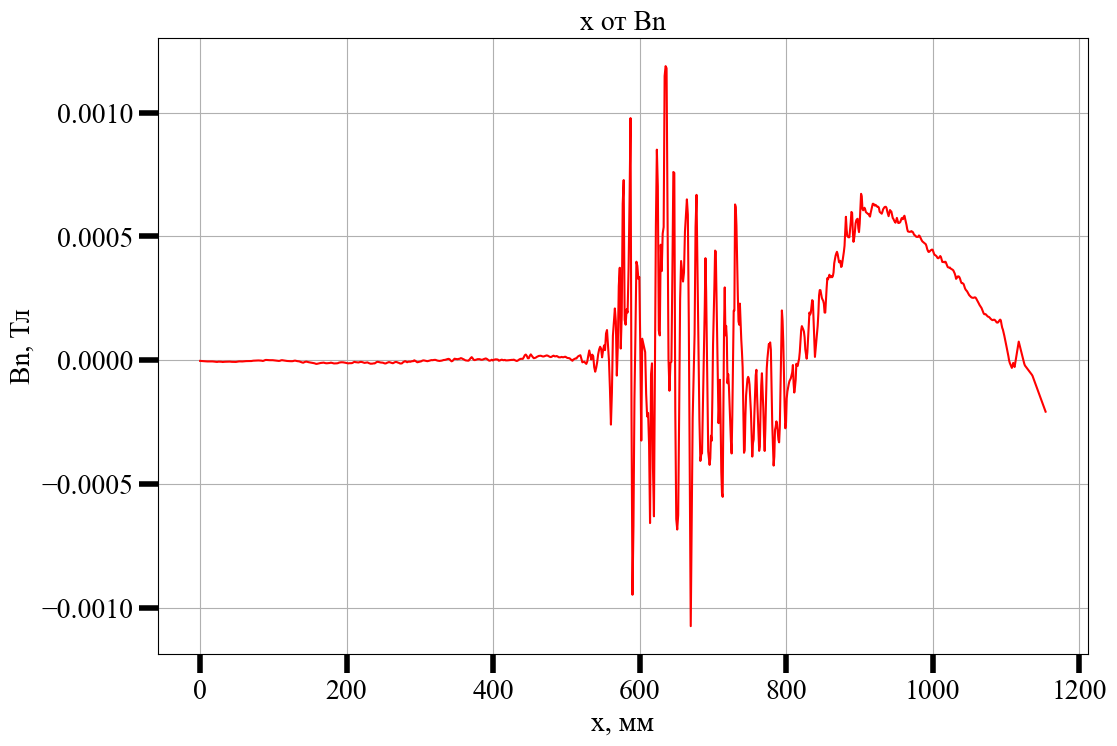

In [200]:
    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami['x'], df_merged_krivaya_primaya_s_yglami['Bn'], color='red', linewidth=1.5)
    plt.xlabel("x, мм")
    plt.ylabel("Bn, Тл")
    plt.title("x от Bn")
    plt.grid(True)
    plt.show()

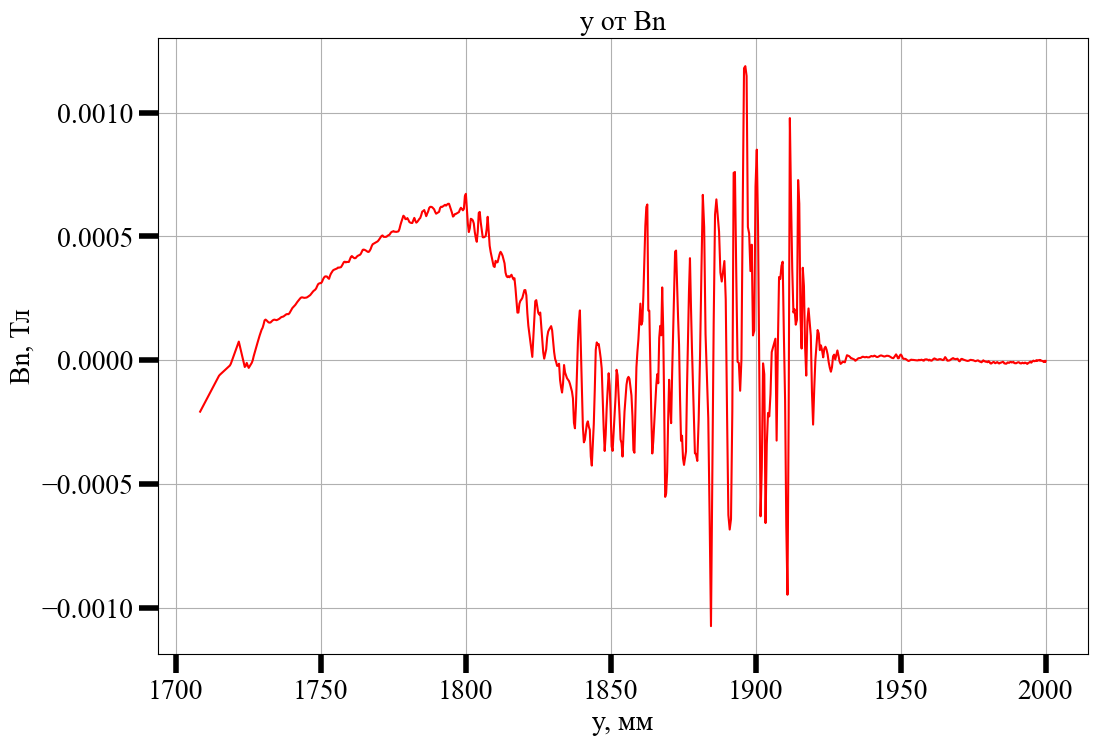

In [201]:
    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami['y'], df_merged_krivaya_primaya_s_yglami['Bn'], color='red', linewidth=1.5)
    plt.xlabel("y, мм")
    plt.ylabel("Bn, Тл")
    plt.title("y от Bn")
    plt.grid(True)
    plt.show()

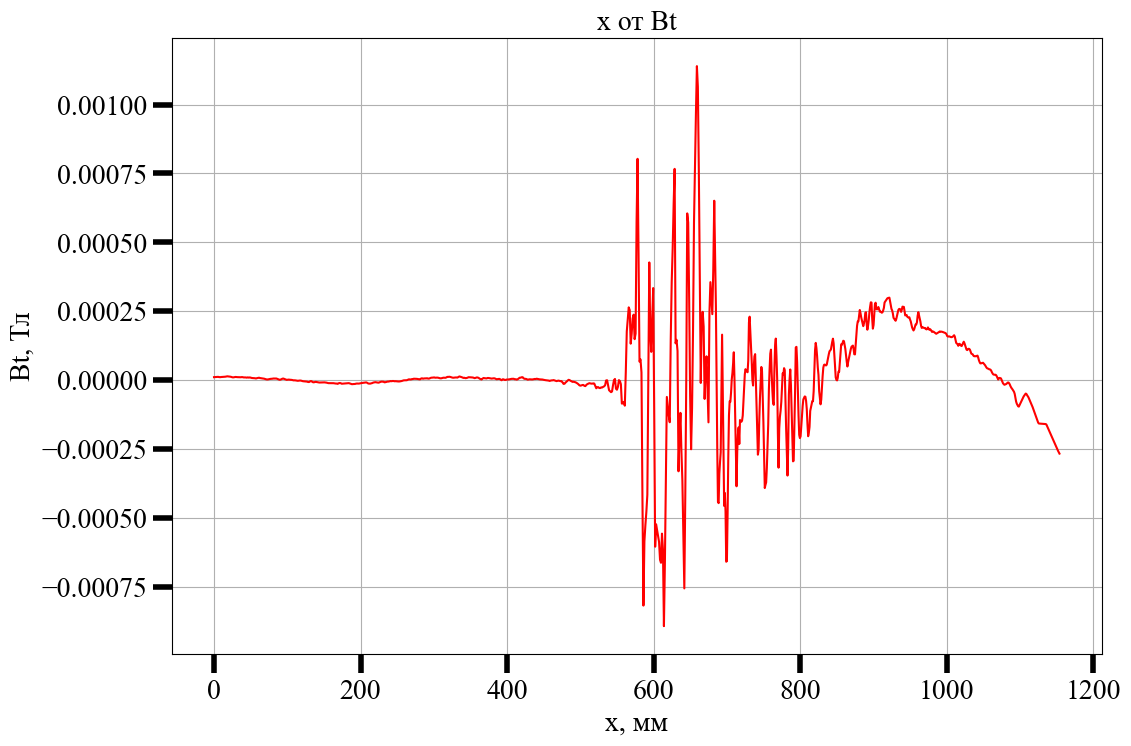

In [202]:
    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami['x'], df_merged_krivaya_primaya_s_yglami['Bt'], color='red', linewidth=1.5)
    plt.xlabel("x, мм")
    plt.ylabel("Bt, Тл")
    plt.title("x от Bt")
    plt.grid(True)
    plt.show()

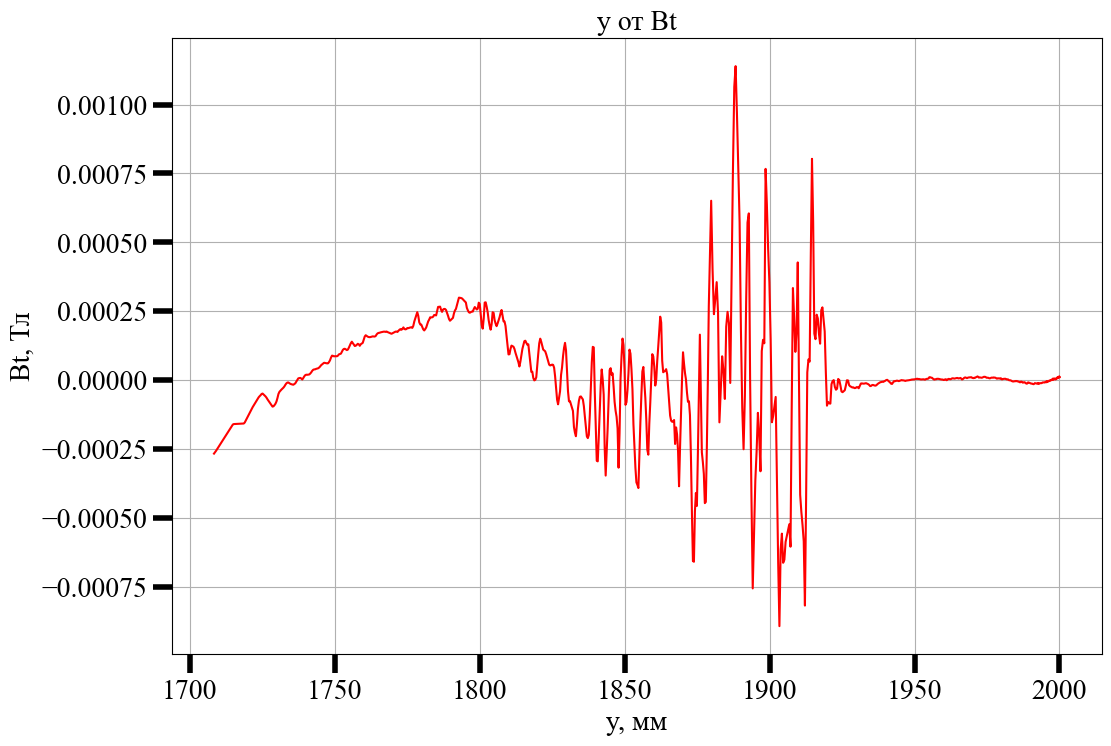

In [203]:
    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami['y'], df_merged_krivaya_primaya_s_yglami['Bt'], color='red', linewidth=1.5)
    plt.xlabel("y, мм")
    plt.ylabel("Bt, Тл")
    plt.title("y от Bt")
    plt.grid(True)
    plt.show()

In [204]:
file_krivaayaaa_1 = pd.read_csv('406_m_model_2_magnets_SP184_and_TM1_kriv_drygaya.table', skiprows=8, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'Bx', 'By', 'Bz'])
file_krivaayaaa_1

x            y    z        Bx            By        Bz
0      0.000000  2000.000000  0.0 -0.000003 -1.071941e-05  1.300391
1     -1.396263  1999.999513  0.0 -0.000003 -1.092868e-05  1.300391
2     -2.792525  1999.998050  0.0 -0.000004 -1.096228e-05  1.300390
3     -4.188786  1999.995614  0.0 -0.000004 -1.124531e-05  1.300389
4     -5.585045  1999.992202  0.0 -0.000004 -1.211881e-05  1.300388
..          ...          ...  ...       ...           ...       ...
496 -678.789218  1881.288175  0.0  0.000371 -2.303767e-04  0.552866
497 -680.102439  1880.813832  0.0  0.000599 -5.664772e-09  0.545592
498 -681.415329  1880.338573  0.0  0.000821 -2.258258e-04  0.538588
499 -682.727886  1879.862397  0.0  0.001648 -3.752974e-04  0.531652
500 -684.040000  1879.385000  0.0  0.001925 -4.087334e-04  0.524563

[501 rows x 6 columns]

In [205]:
def create_ygol_column(df):
    """
    Добавляет в DataFrame новый столбец 'ygol', значения которого вычисляются
    по формуле, имитирующей логику Excel.
    """

    first_value = 90
    last_value = 70
    num_rows = len(df)

    # Проверка, что в DataFrame достаточно строк
    if num_rows < 2:
        raise ValueError("DataFrame должен содержать как минимум 2 строки для вычисления ygol.")

    # Создаем массив ygol
    ygol_values = [first_value]  # Первое значение

    # Вычисляем остальные значения ygol
    for i in range(1, num_rows):
        ygol = abs((last_value - first_value) / (num_rows - 1) + ygol_values[i - 1])
        ygol_values.append(ygol)

    # Добавляем столбец ygol в DataFrame
    df['ygol'] = ygol_values

    return df

In [206]:
df_22_1= create_ygol_column(file_krivaayaaa_1)
df_22_1

x            y    z        Bx            By        Bz   ygol
0      0.000000  2000.000000  0.0 -0.000003 -1.071941e-05  1.300391  90.00
1     -1.396263  1999.999513  0.0 -0.000003 -1.092868e-05  1.300391  89.96
2     -2.792525  1999.998050  0.0 -0.000004 -1.096228e-05  1.300390  89.92
3     -4.188786  1999.995614  0.0 -0.000004 -1.124531e-05  1.300389  89.88
4     -5.585045  1999.992202  0.0 -0.000004 -1.211881e-05  1.300388  89.84
..          ...          ...  ...       ...           ...       ...    ...
496 -678.789218  1881.288175  0.0  0.000371 -2.303767e-04  0.552866  70.16
497 -680.102439  1880.813832  0.0  0.000599 -5.664772e-09  0.545592  70.12
498 -681.415329  1880.338573  0.0  0.000821 -2.258258e-04  0.538588  70.08
499 -682.727886  1879.862397  0.0  0.001648 -3.752974e-04  0.531652  70.04
500 -684.040000  1879.385000  0.0  0.001925 -4.087334e-04  0.524563  70.00

[501 rows x 7 columns]

In [207]:
file_priamaayaaa_1 = pd.read_csv('406_m_model_2_magnets_SP184_and_TM1_priam_drygaya.table', skiprows=8, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'Bx', 'By', 'Bz']).iloc[1:]
file_priamaayaaa_1['ygol'] = 70
file_priamaayaaa_1

x           y    z        Bx        By        Bz  ygol
1    -684.979694  1879.04298  0.0  0.001205 -0.000503  0.519394    70
2    -685.919388  1878.70096  0.0  0.000285 -0.000699  0.514073    70
3    -686.859082  1878.35894  0.0 -0.000135 -0.000559  0.508958    70
4    -687.798776  1878.01692  0.0 -0.000462 -0.000462  0.503791    70
5    -688.738470  1877.67490  0.0 -0.000828 -0.000487  0.498525    70
..           ...         ...  ...       ...       ...       ...   ...
496 -1150.128224  1709.74308  0.0  0.000271  0.000132  0.000780    70
497 -1151.067918  1709.40106  0.0  0.000279  0.000134  0.000777    70
498 -1152.007612  1709.05904  0.0  0.000287  0.000137  0.000775    70
499 -1152.947306  1708.71702  0.0  0.000295  0.000139  0.000772    70
500 -1153.887000  1708.37500  0.0  0.000303  0.000142  0.000769    70

[500 rows x 7 columns]

In [208]:
# Объединение данных
df_merged_krivaya_primaya_s_yglami_1 = pd.concat([df_22_1, file_priamaayaaa_1], ignore_index=True)
df_merged_krivaya_primaya_s_yglami_1

x            y    z        Bx        By        Bz   ygol
0        0.000000  2000.000000  0.0 -0.000003 -0.000011  1.300391  90.00
1       -1.396263  1999.999513  0.0 -0.000003 -0.000011  1.300391  89.96
2       -2.792525  1999.998050  0.0 -0.000004 -0.000011  1.300390  89.92
3       -4.188786  1999.995614  0.0 -0.000004 -0.000011  1.300389  89.88
4       -5.585045  1999.992202  0.0 -0.000004 -0.000012  1.300388  89.84
...           ...          ...  ...       ...       ...       ...    ...
996  -1150.128224  1709.743080  0.0  0.000271  0.000132  0.000780  70.00
997  -1151.067918  1709.401060  0.0  0.000279  0.000134  0.000777  70.00
998  -1152.007612  1709.059040  0.0  0.000287  0.000137  0.000775  70.00
999  -1152.947306  1708.717020  0.0  0.000295  0.000139  0.000772  70.00
1000 -1153.887000  1708.375000  0.0  0.000303  0.000142  0.000769  70.00

[1001 rows x 7 columns]

In [209]:
#df_merged_krivaya_primaya_s_yglami['Bn'] = 
df_merged_krivaya_primaya_s_yglami_1['Bn'] = df_merged_krivaya_primaya_s_yglami_1['By']*np.cos(np.radians(df_merged_krivaya_primaya_s_yglami_1['ygol'])) + df_merged_krivaya_primaya_s_yglami_1['Bx']*np.sin(np.radians(df_merged_krivaya_primaya_s_yglami_1['ygol']))
df_merged_krivaya_primaya_s_yglami_1['Bt'] = df_merged_krivaya_primaya_s_yglami_1['Bx']*np.cos(np.radians(df_merged_krivaya_primaya_s_yglami_1['ygol'])) - df_merged_krivaya_primaya_s_yglami_1['By']*np.sin(np.radians(df_merged_krivaya_primaya_s_yglami_1['ygol']))

In [210]:
df_merged_krivaya_primaya_s_yglami_1

x            y    z        Bx        By        Bz   ygol  \
0        0.000000  2000.000000  0.0 -0.000003 -0.000011  1.300391  90.00   
1       -1.396263  1999.999513  0.0 -0.000003 -0.000011  1.300391  89.96   
2       -2.792525  1999.998050  0.0 -0.000004 -0.000011  1.300390  89.92   
3       -4.188786  1999.995614  0.0 -0.000004 -0.000011  1.300389  89.88   
4       -5.585045  1999.992202  0.0 -0.000004 -0.000012  1.300388  89.84   
...           ...          ...  ...       ...       ...       ...    ...   
996  -1150.128224  1709.743080  0.0  0.000271  0.000132  0.000780  70.00   
997  -1151.067918  1709.401060  0.0  0.000279  0.000134  0.000777  70.00   
998  -1152.007612  1709.059040  0.0  0.000287  0.000137  0.000775  70.00   
999  -1152.947306  1708.717020  0.0  0.000295  0.000139  0.000772  70.00   
1000 -1153.887000  1708.375000  0.0  0.000303  0.000142  0.000769  70.00   

            Bn        Bt  
0    -0.000003  0.000011  
1    -0.000003  0.000011  
2    -0.000004  0.000011  
3    -0.000004  0.000011  
4    -0.000004  0.000012  
...        ...       ...  
996   0.000299 -0.000031  
997   0.000308 -0.000031  
998   0.000316 -0.000031  
999   0.000325 -0.000030  
1000  0.000334 -0.000030  

[1001 rows x 9 columns]

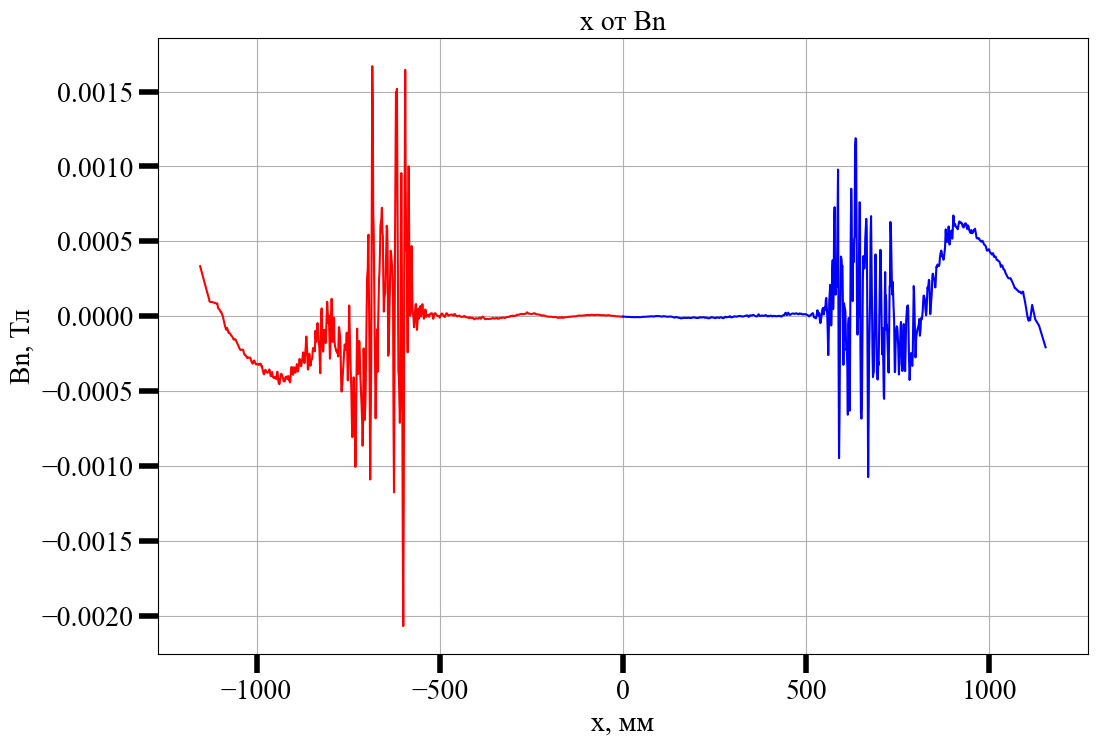

In [211]:
    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami_1['x'], df_merged_krivaya_primaya_s_yglami_1['Bn'], color='red', linewidth=1.5)
    plt.plot(df_merged_krivaya_primaya_s_yglami['x'], df_merged_krivaya_primaya_s_yglami['Bn'], color='blue', linewidth=1.5)
    plt.xlabel("x, мм")
    plt.ylabel("Bn, Тл")
    plt.title("x от Bn")
    plt.grid(True)
    plt.show()

### Распреление тангенциальной и нормальной составляющей магнитного поля при зеркальном соседствующем магните СП184, без экранирования

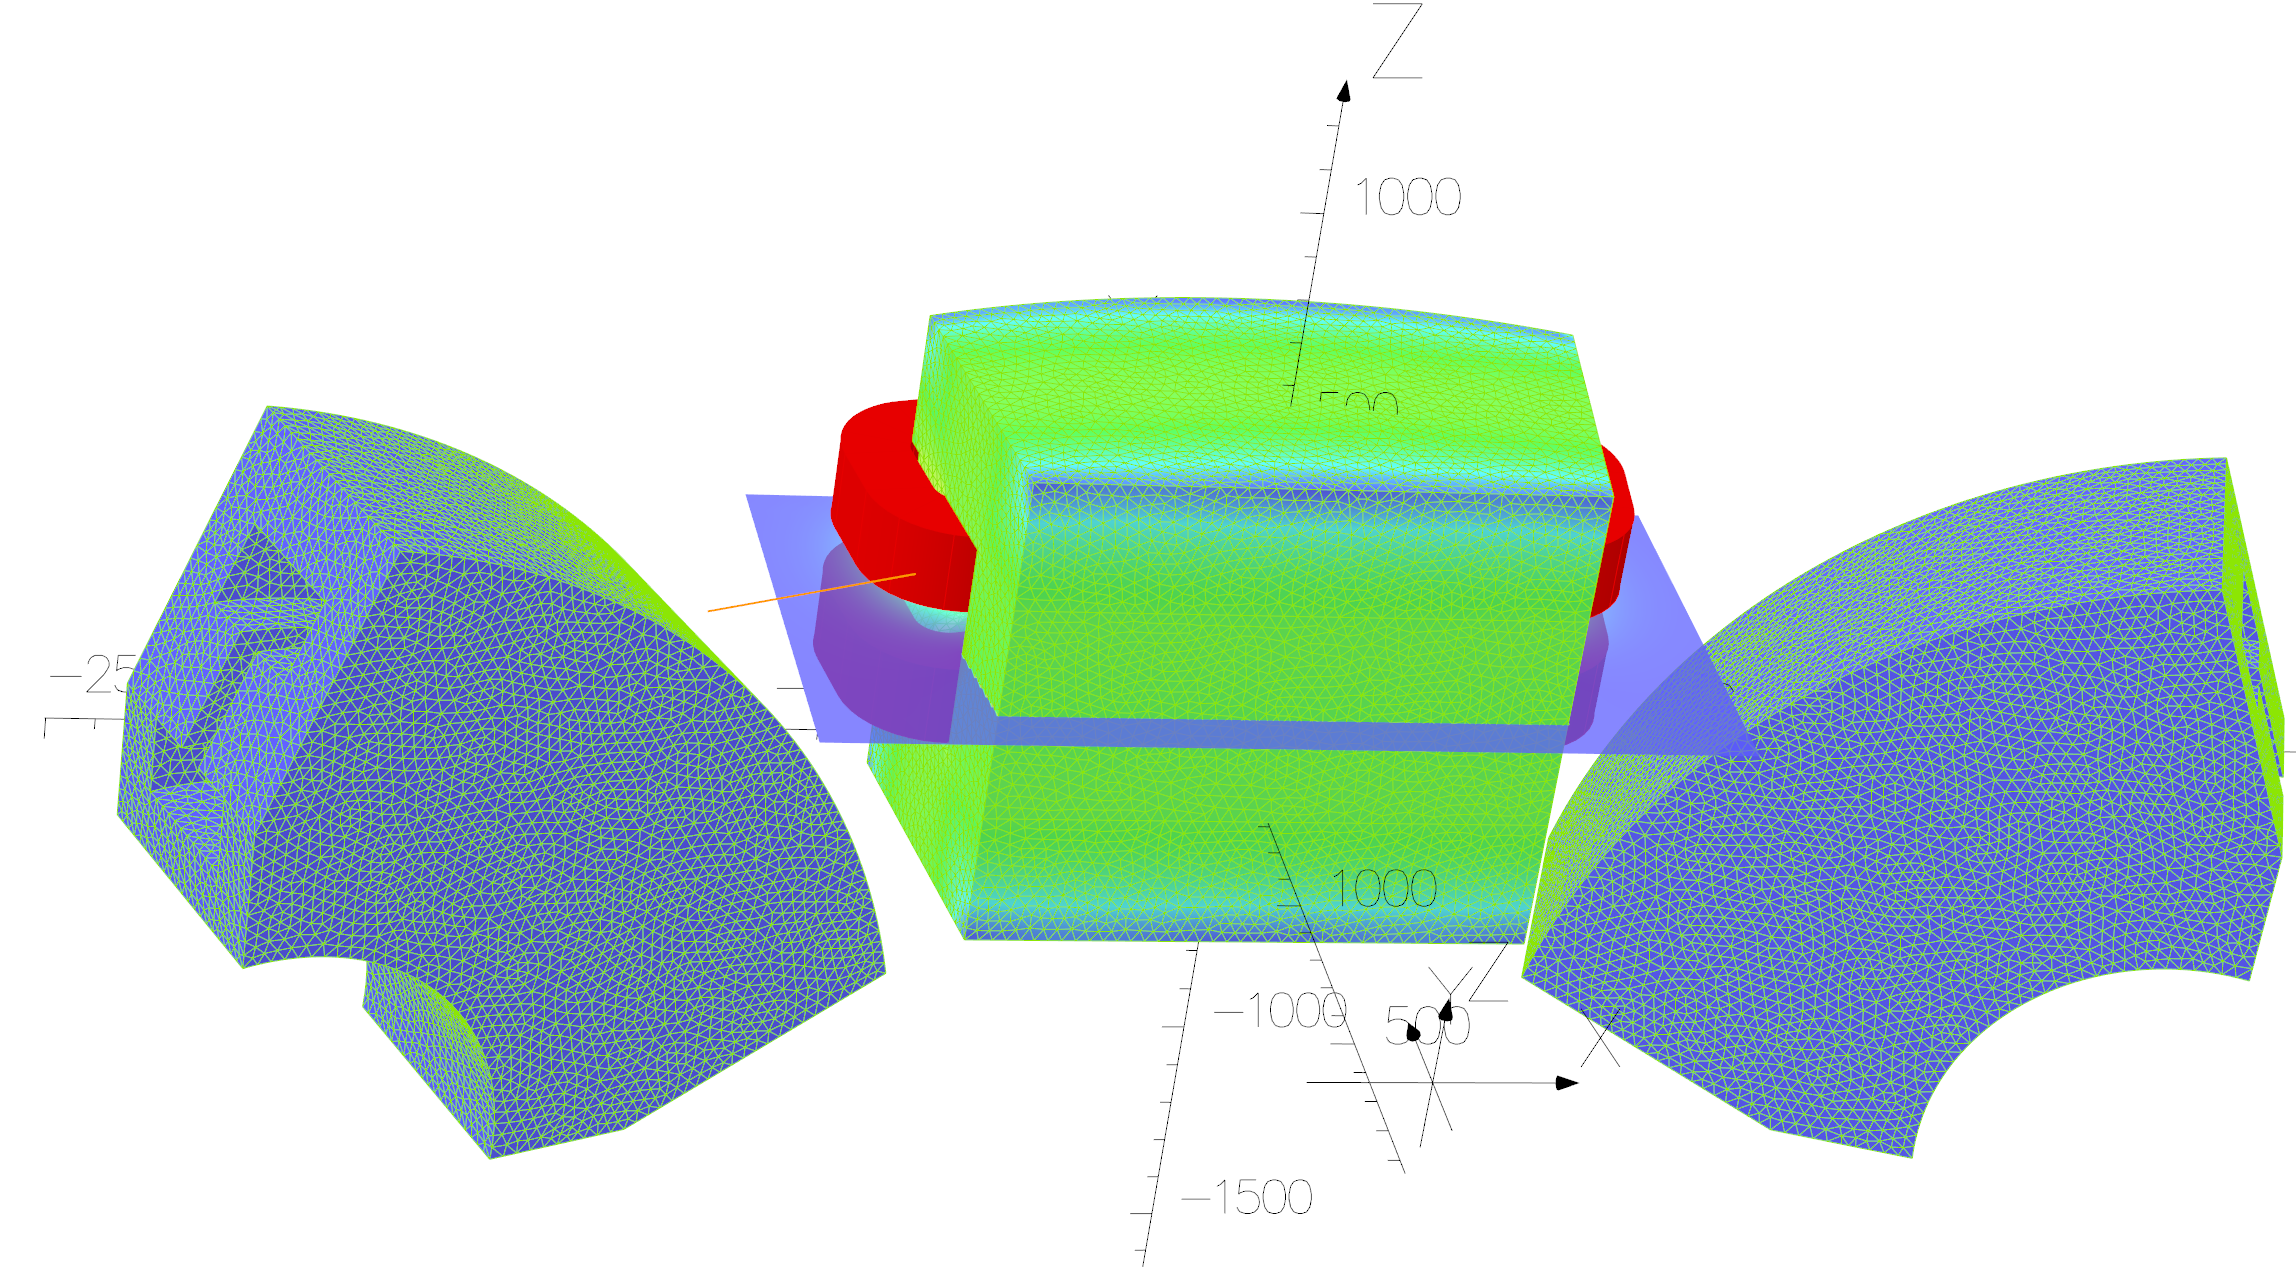

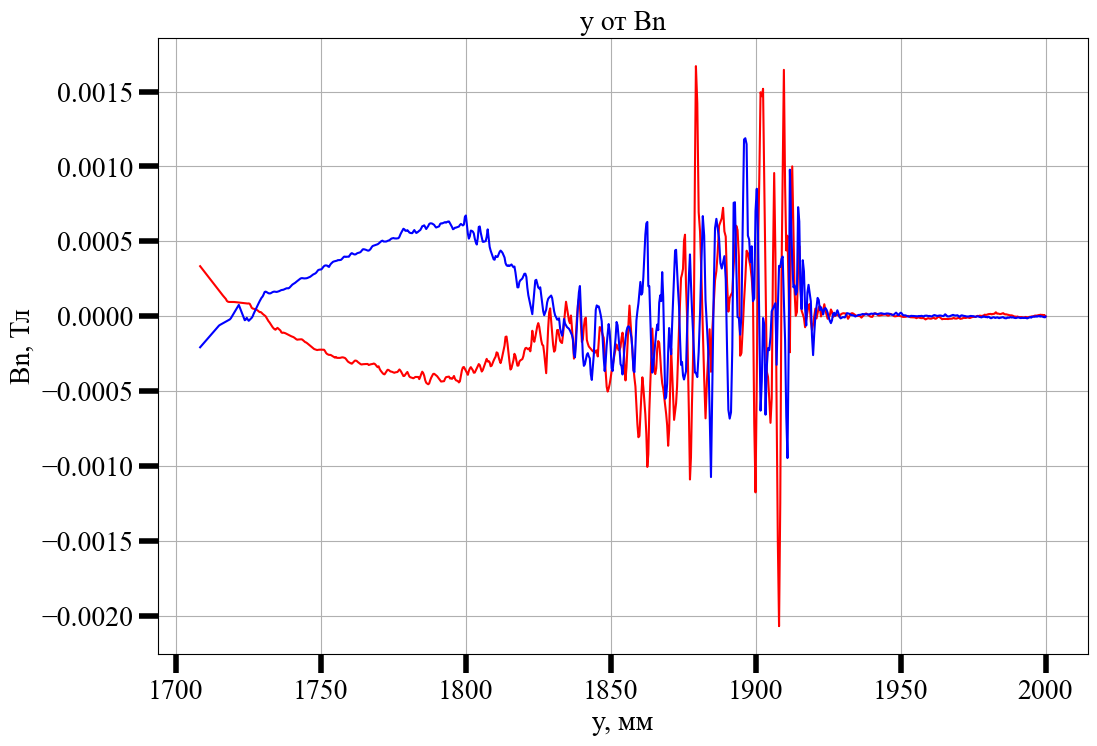

In [212]:
    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami_1['y'], df_merged_krivaya_primaya_s_yglami_1['Bn'], color='red', linewidth=1.5)
    plt.plot(df_merged_krivaya_primaya_s_yglami['y'], df_merged_krivaya_primaya_s_yglami['Bn'], color='blue', linewidth=1.5)

    plt.xlabel("y, мм")
    plt.ylabel("Bn, Тл")
    plt.title("y от Bn")
    plt.grid(True)
    plt.show()

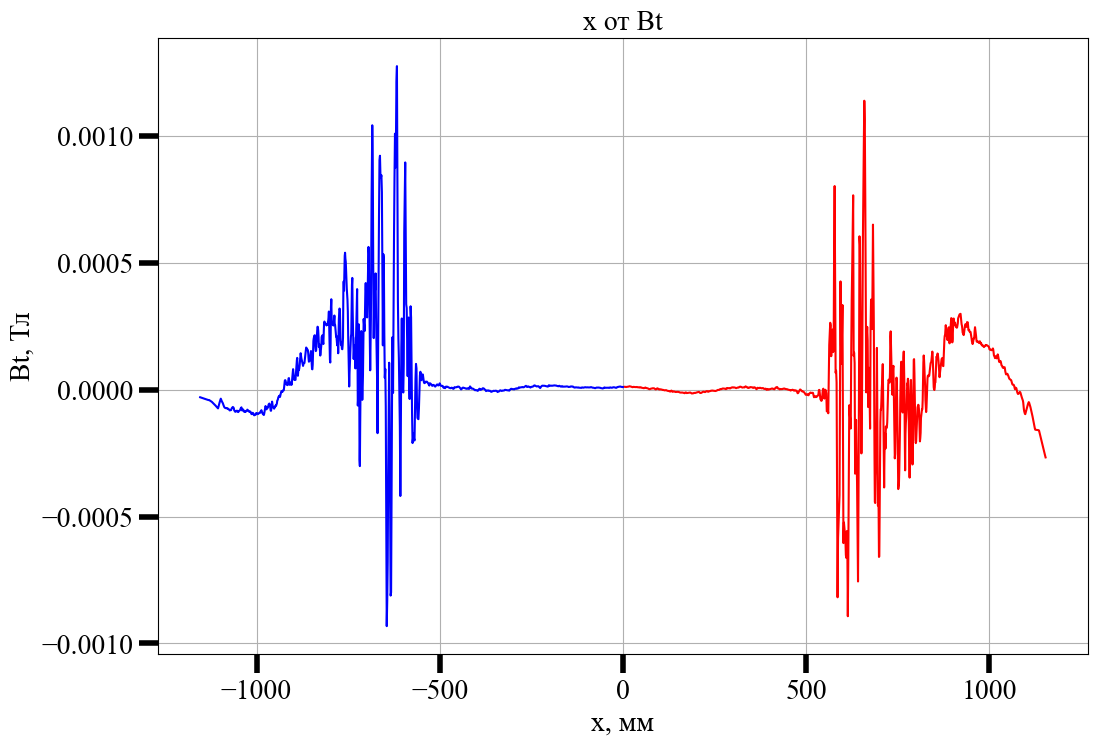

In [213]:
    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami['x'], df_merged_krivaya_primaya_s_yglami['Bt'], color='red', linewidth=1.5)
    plt.plot(df_merged_krivaya_primaya_s_yglami_1['x'], df_merged_krivaya_primaya_s_yglami_1['Bt'], color='blue', linewidth=1.5)
    plt.xlabel("x, мм")
    plt.ylabel("Bt, Тл")
    plt.title("x от Bt")
    plt.grid(True)
    plt.show()

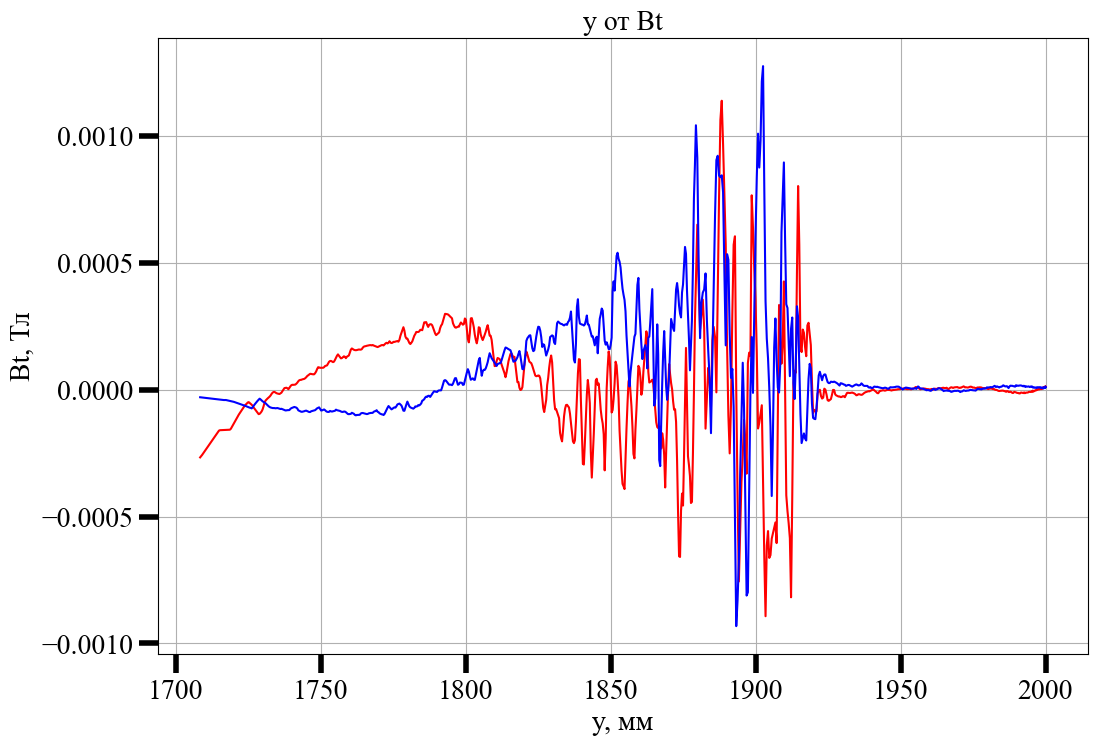

In [214]:
    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami['y'], df_merged_krivaya_primaya_s_yglami['Bt'], color='red', linewidth=1.5)
    plt.plot(df_merged_krivaya_primaya_s_yglami_1['y'], df_merged_krivaya_primaya_s_yglami_1['Bt'], color='blue', linewidth=1.5)
    plt.xlabel("y, мм")
    plt.ylabel("Bt, Тл")
    plt.title("y от Bt")
    plt.grid(True)
    plt.show()

### В итоге наблюдается сеточный шум в пределах 20 Гс, что довольно приемлемо. Для уменьшения дребезга необходимо понизить размерность сетки в межполюсном зазоре магнита

### Расчет для более мелкой сетки при мат. моделировании магнита

In [215]:
def process_and_plot(file_kriv, file_priam):
    """
    Обрабатывает два файла (kriv и priam), вычисляет Bn и Bt, и строит графики.

    Args:
        file_kriv (str): Путь к файлу kriv.
        file_priam (str): Путь к файлу priam.
    """

    def create_ygol_column(df):
        """Добавляет столбец 'ygol' с значениями от 90 до 70."""
        first_value = 90
        last_value = 70
        num_rows = len(df)
        if num_rows < 2:
            raise ValueError("DataFrame нужен минимум с 2 строками для ygol.")
        ygol_values = [first_value]
        for i in range(1, num_rows):
            ygol = abs((last_value - first_value) / (num_rows - 1) + ygol_values[i - 1])
            ygol_values.append(ygol)
        df['ygol'] = ygol_values
        return df

    # Чтение и обработка файла kriv
    file_krivaayaaa_1 = pd.read_csv(file_kriv, skiprows=8, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'Bx', 'By', 'Bz'])
    df_22_1 = create_ygol_column(file_krivaayaaa_1)

    # Чтение и обработка файла priam
    file_priamaayaaa_1 = pd.read_csv(file_priam, skiprows=8, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'Bx', 'By', 'Bz']).iloc[1:]
    file_priamaayaaa_1['ygol'] = 70

    # Объединение данных
    df_merged_krivaya_primaya_s_yglami_1 = pd.concat([df_22_1, file_priamaayaaa_1], ignore_index=True)

    # Вычисление Bn и Bt
    df_merged_krivaya_primaya_s_yglami_1['Bn'] = df_merged_krivaya_primaya_s_yglami_1['By'] * np.cos(np.radians(df_merged_krivaya_primaya_s_yglami_1['ygol'])) + df_merged_krivaya_primaya_s_yglami_1['Bx'] * np.sin(np.radians(df_merged_krivaya_primaya_s_yglami_1['ygol']))
    df_merged_krivaya_primaya_s_yglami_1['Bt'] = df_merged_krivaya_primaya_s_yglami_1['Bx'] * np.cos(np.radians(df_merged_krivaya_primaya_s_yglami_1['ygol'])) - df_merged_krivaya_primaya_s_yglami_1['By'] * np.sin(np.radians(df_merged_krivaya_primaya_s_yglami_1['ygol']))


    # Построение графиков
    linewidth = 1.5  # Зададим толщину линии

    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami_1['x'], df_merged_krivaya_primaya_s_yglami_1['Bn'], color='red', linewidth=linewidth, label='Объединенные данные') # Добавили подпись
    plt.xlabel("x, мм")
    plt.ylabel("Bn, Тл")
    plt.title("Bn от x")
    plt.grid(True)
    plt.legend() # Добавили легенду, чтобы было видно, какой график что показывает
    plt.show()


    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami_1['y'], df_merged_krivaya_primaya_s_yglami_1['Bn'], color='red', linewidth=linewidth, label='Объединенные данные') # Добавили подпись

    plt.xlabel("y, мм")
    plt.ylabel("Bn, Тл")
    plt.title("Bn от y")
    plt.grid(True)
    plt.legend()
    plt.show()


    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami_1['x'], df_merged_krivaya_primaya_s_yglami_1['Bt'], color='red', linewidth=linewidth, label='Объединенные данные') # Добавили подпись
    plt.xlabel("x, мм")
    plt.ylabel("Bt, Тл")
    plt.title("Bt от x")
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami_1['y'], df_merged_krivaya_primaya_s_yglami_1['Bt'], color='red', linewidth=linewidth, label='Объединенные данные') # Добавили подпись
    plt.xlabel("y, мм")
    plt.ylabel("Bt, Тл")
    plt.title("Bt от y")
    plt.grid(True)
    plt.legend()
    plt.show()


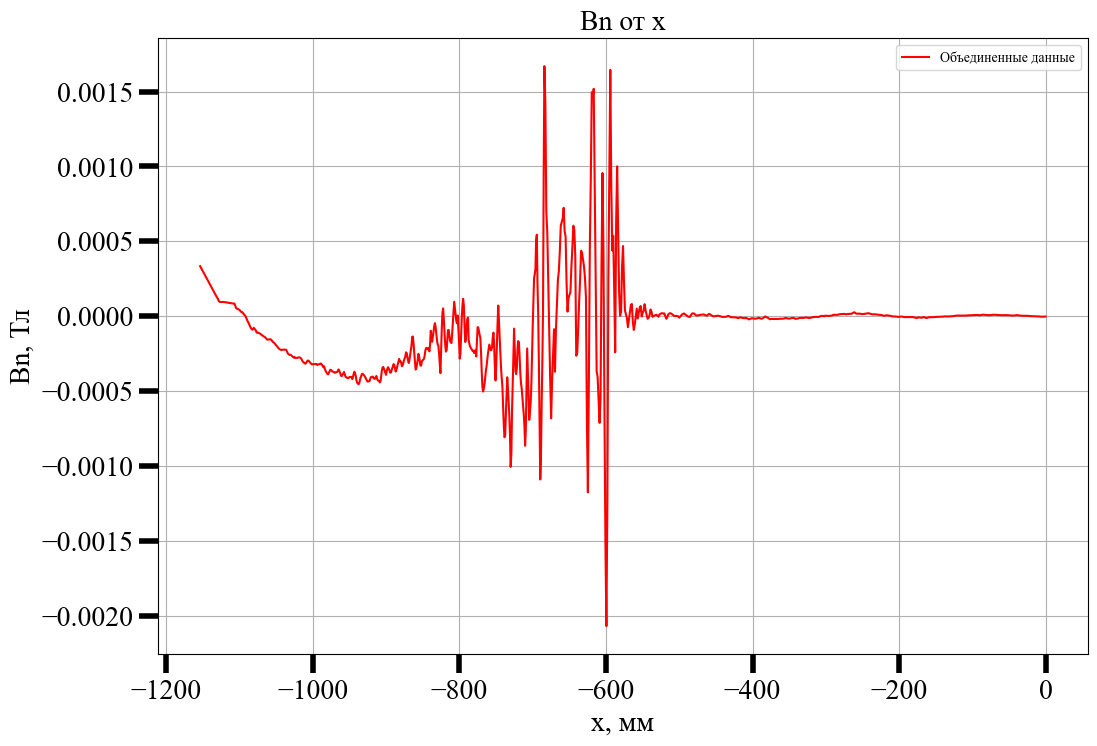

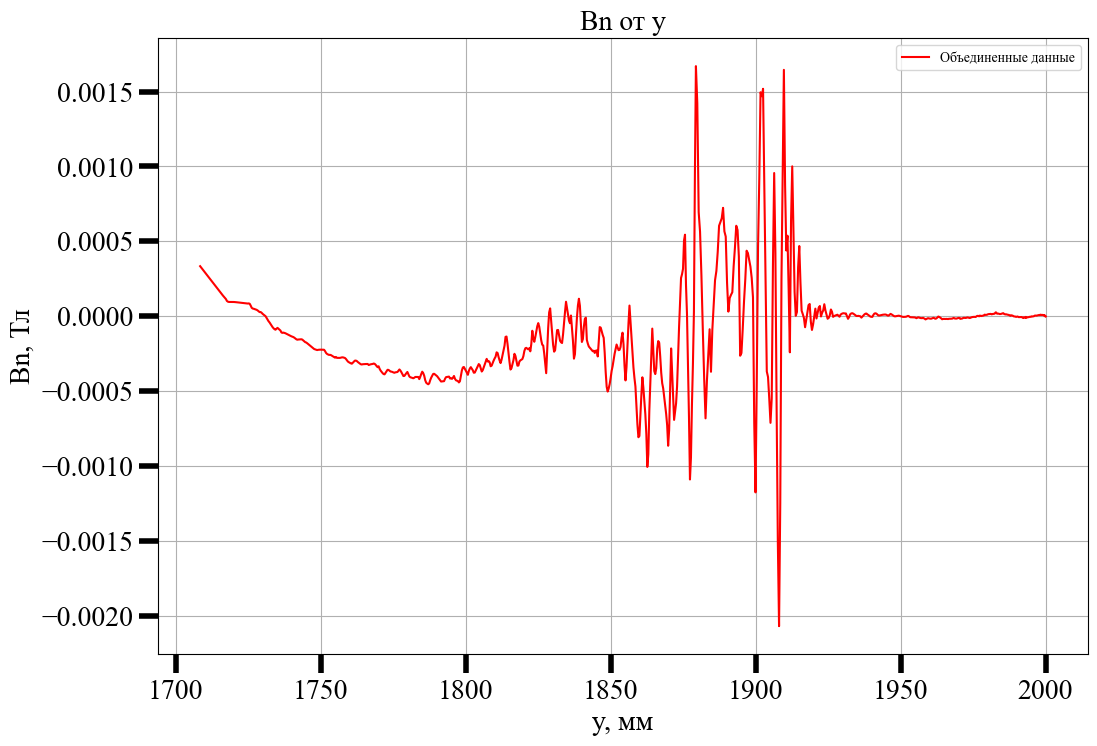

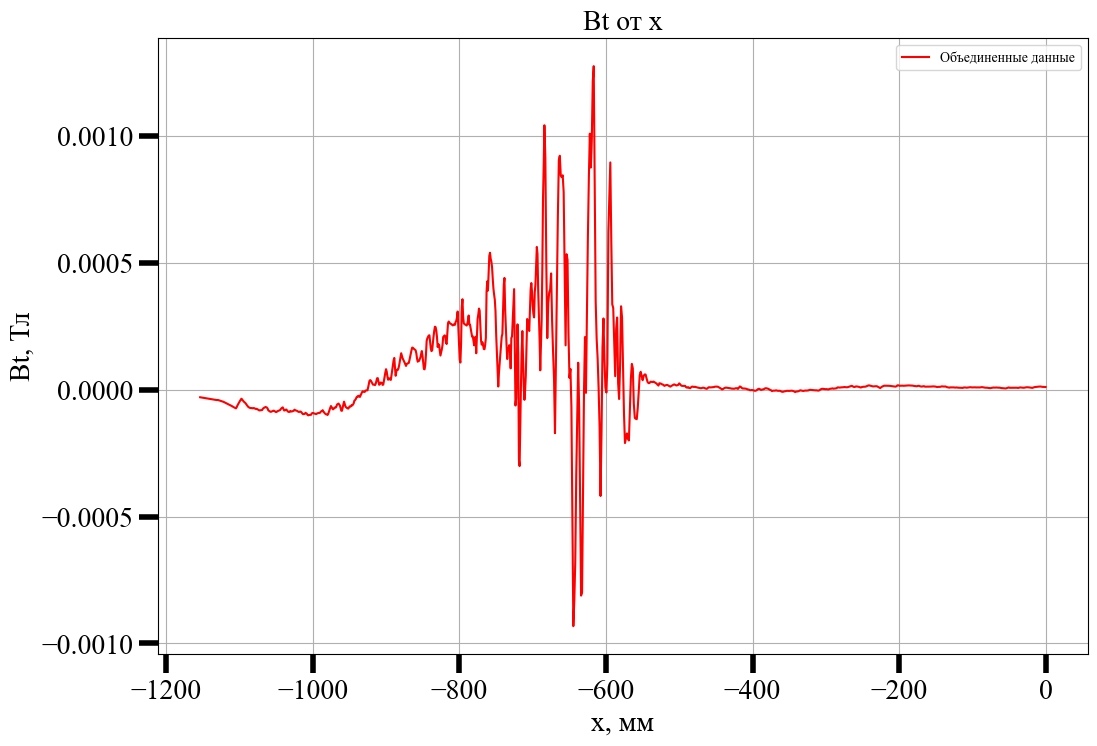

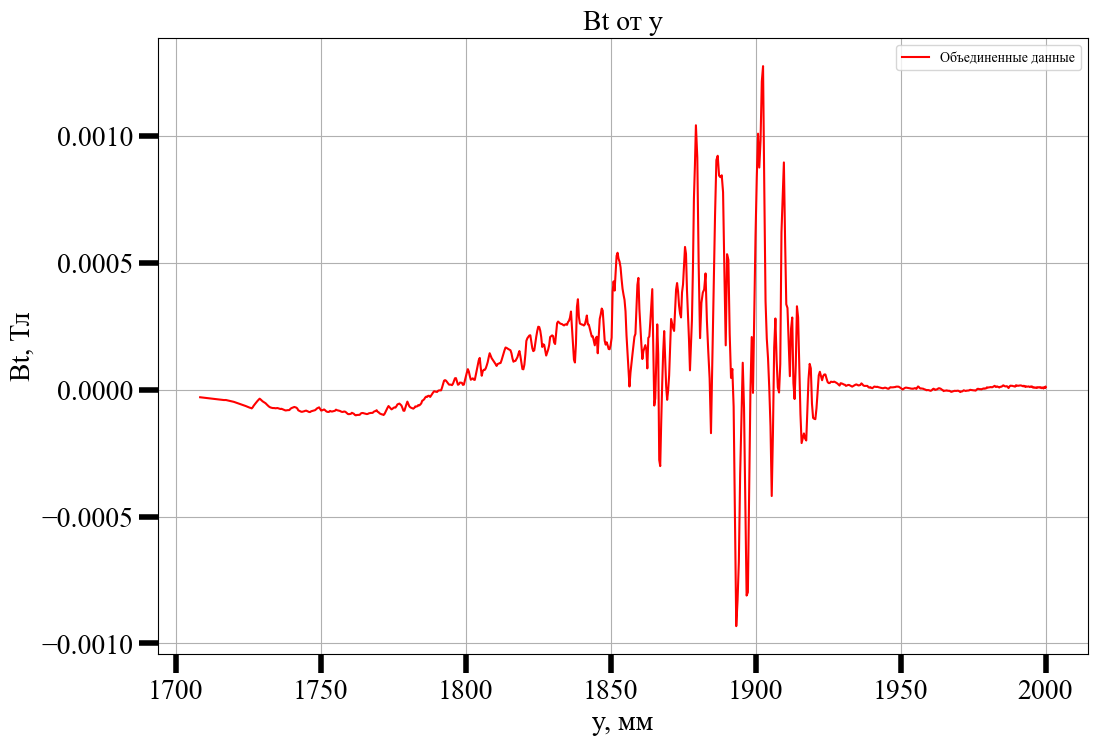

In [216]:
process_and_plot(
    file_kriv='406_m_model_2_magnets_SP184_and_TM1_kriv_drygaya.table',
    file_priam='406_m_model_2_magnets_SP184_and_TM1_priam_drygaya.table'
)

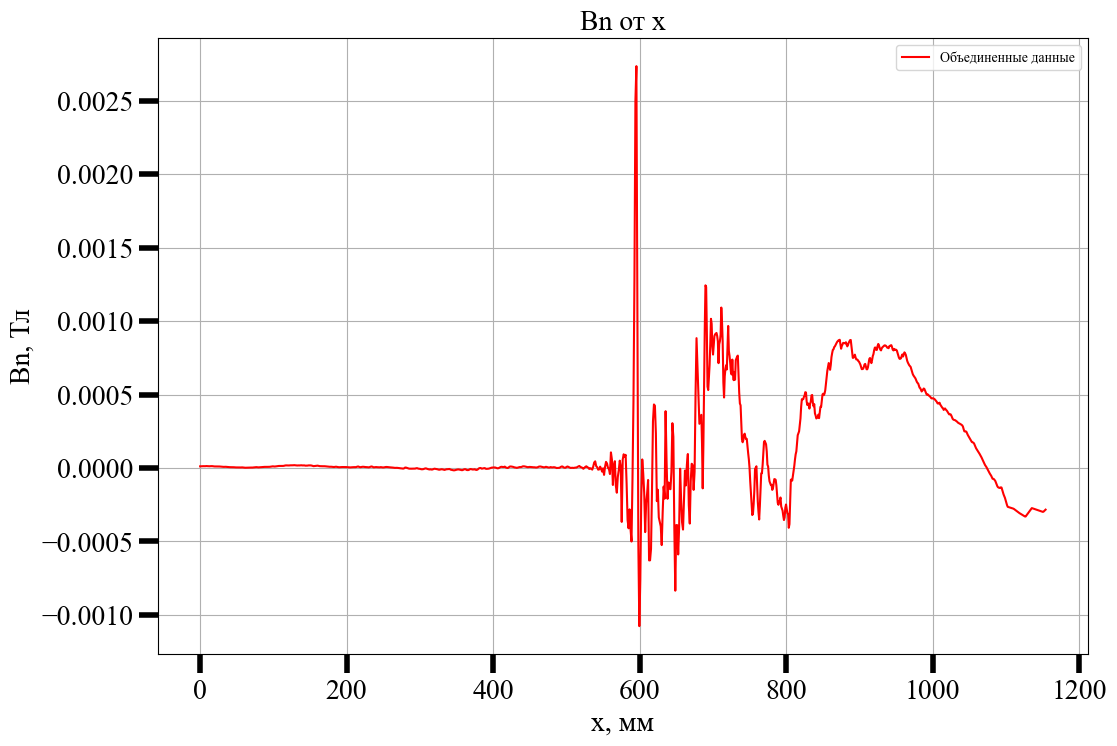

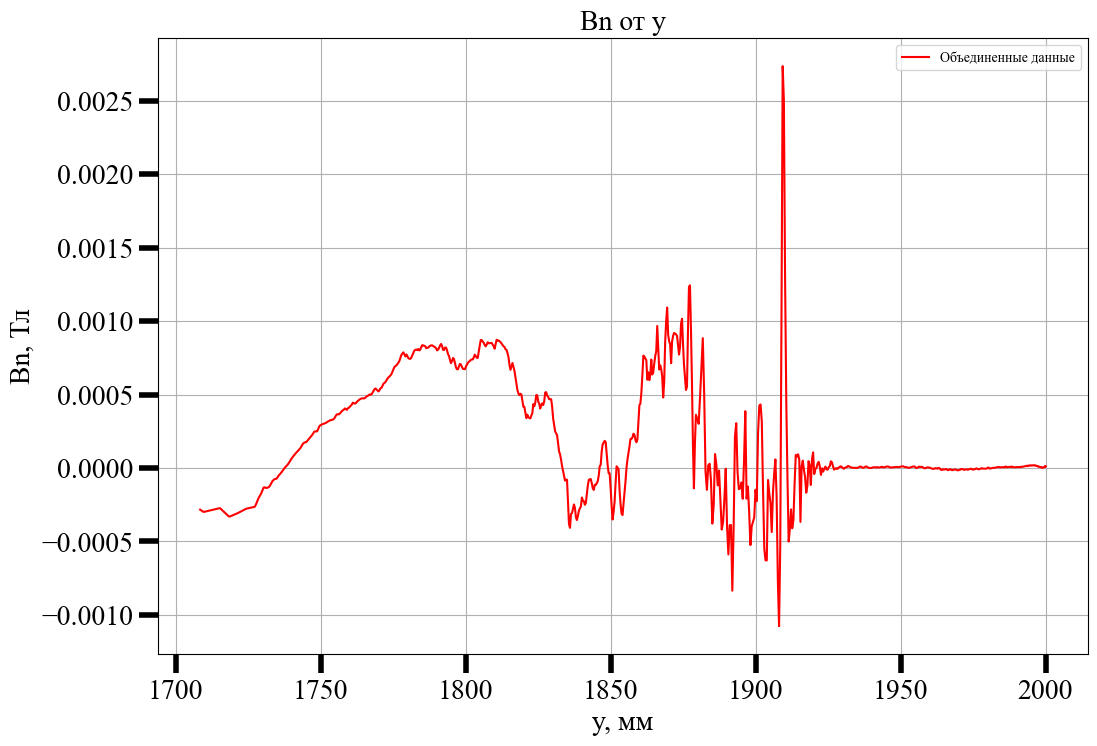

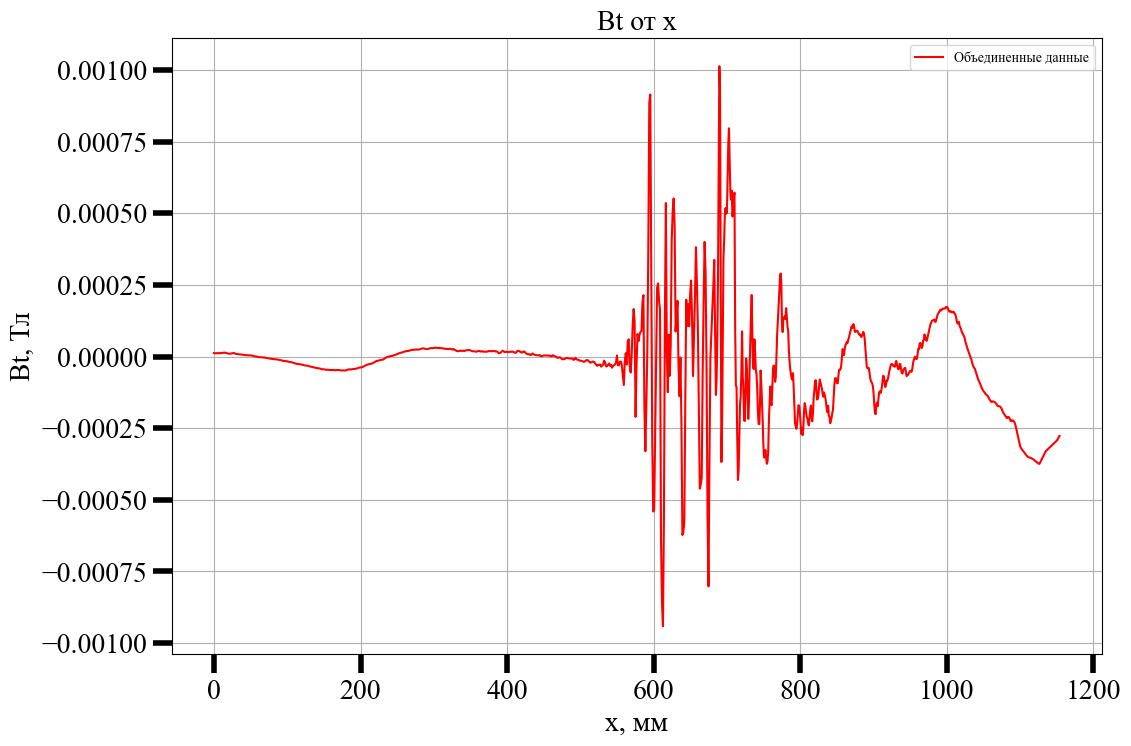

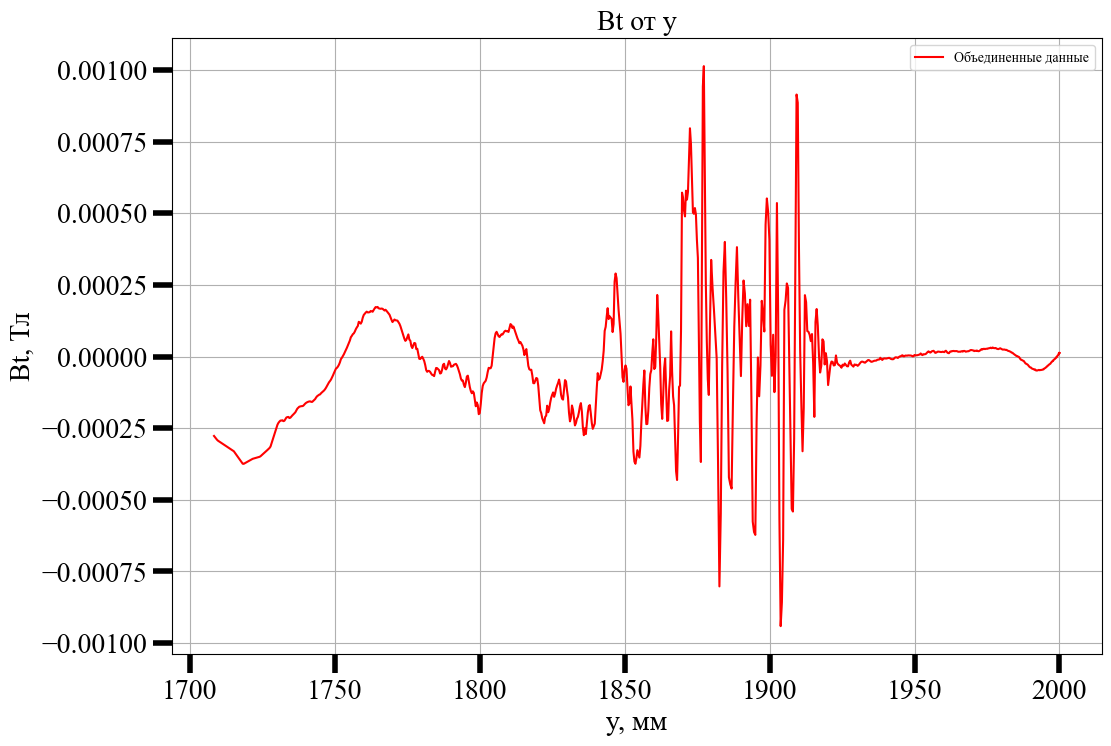

In [217]:
process_and_plot(
    file_kriv='406_m_model_2_magnets_SP184_and_TM1_kriv_20mm_SETKA_3mm.table',
    file_priam='406_m_model_2_magnets_SP184_and_TM1_priam_20mm_SETKA_3mm.table'
)

In [218]:
def process_and_plot(file_kriv, file_priam, window=20):  # Добавлен аргумент window для размера скользящего среднего
    """
    Обрабатывает два файла (kriv и priam), вычисляет Bn и Bt, применяет скользящее среднее и строит графики.

    Args:
        file_kriv (str): Путь к файлу kriv.
        file_priam (str): Путь к файлу priam.
        window (int): Размер окна для скользящего среднего.
    """

    def create_ygol_column(df):
        """Добавляет столбец 'ygol' с значениями от 90 до 70."""
        first_value = 90
        last_value = 70
        num_rows = len(df)
        if num_rows < 2:
            raise ValueError("DataFrame нужен минимум с 2 строками для ygol.")
        ygol_values = [first_value]
        for i in range(1, num_rows):
            ygol = abs((last_value - first_value) / (num_rows - 1) + ygol_values[i - 1])
            ygol_values.append(ygol)
        df['ygol'] = ygol_values
        return df

    # Чтение и обработка файла kriv
    file_krivaayaaa_1 = pd.read_csv(file_kriv, skiprows=8, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'Bx', 'By', 'Bz'])
    df_22_1 = create_ygol_column(file_krivaayaaa_1)

    # Чтение и обработка файла priam
    file_priamaayaaa_1 = pd.read_csv(file_priam, skiprows=8, delimiter=r'\s+', header=None, names=['x', 'y', 'z', 'Bx', 'By', 'Bz']).iloc[1:]
    file_priamaayaaa_1['ygol'] = 70

    # Объединение данных
    df_merged_krivaya_primaya_s_yglami_1 = pd.concat([df_22_1, file_priamaayaaa_1], ignore_index=True)

    # Вычисление Bn и Bt
    df_merged_krivaya_primaya_s_yglami_1['Bn'] = df_merged_krivaya_primaya_s_yglami_1['By'] * np.cos(np.radians(df_merged_krivaya_primaya_s_yglami_1['ygol'])) + df_merged_krivaya_primaya_s_yglami_1['Bx'] * np.sin(np.radians(df_merged_krivaya_primaya_s_yglami_1['ygol']))
    df_merged_krivaya_primaya_s_yglami_1['Bt'] = df_merged_krivaya_primaya_s_yglami_1['Bx'] * np.cos(np.radians(df_merged_krivaya_primaya_s_yglami_1['ygol'])) - df_merged_krivaya_primaya_s_yglami_1['By'] * np.sin(np.radians(df_merged_krivaya_primaya_s_yglami_1['ygol']))

    # Применение скользящего среднего
    df_merged_krivaya_primaya_s_yglami_1['Bn_smooth'] = df_merged_krivaya_primaya_s_yglami_1['Bn'].rolling(window=window).mean()
    df_merged_krivaya_primaya_s_yglami_1['Bt_smooth'] = df_merged_krivaya_primaya_s_yglami_1['Bt'].rolling(window=window).mean()


    # Построение графиков
    linewidth = 1.5  # Зададим толщину линии

    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami_1['x'], df_merged_krivaya_primaya_s_yglami_1['Bn_smooth'], color='red', linewidth=linewidth, label=f'Bn (Скользящее среднее, окно={window})')  # Используем сглаженные данные
    plt.xlabel("x, мм")
    plt.ylabel("Bn, Тл")
    plt.title("Bn от x")
    plt.grid(True)
    plt.legend()
    plt.show()


    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami_1['y'], df_merged_krivaya_primaya_s_yglami_1['Bn_smooth'], color='red', linewidth=linewidth, label=f'Bn (Скользящее среднее, окно={window})')  # Используем сглаженные данные
    plt.xlabel("y, мм")
    plt.ylabel("Bn, Тл")
    plt.title("Bn от y")
    plt.grid(True)
    plt.legend()
    plt.show()


    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami_1['x'], df_merged_krivaya_primaya_s_yglami_1['Bt_smooth'], color='red', linewidth=linewidth, label=f'Bt (Скользящее среднее, окно={window})')  # Используем сглаженные данные
    plt.xlabel("x, мм")
    plt.ylabel("Bt, Тл")
    plt.title("Bt от x")
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(df_merged_krivaya_primaya_s_yglami_1['y'], df_merged_krivaya_primaya_s_yglami_1['Bt_smooth'], color='red', linewidth=linewidth, label=f'Bt (Скользящее среднее, окно={window})')  # Используем сглаженные данные
    plt.xlabel("y, мм")
    plt.ylabel("Bt, Тл")
    plt.title("Bt от y")
    plt.grid(True)
    plt.legend()
    plt.show()




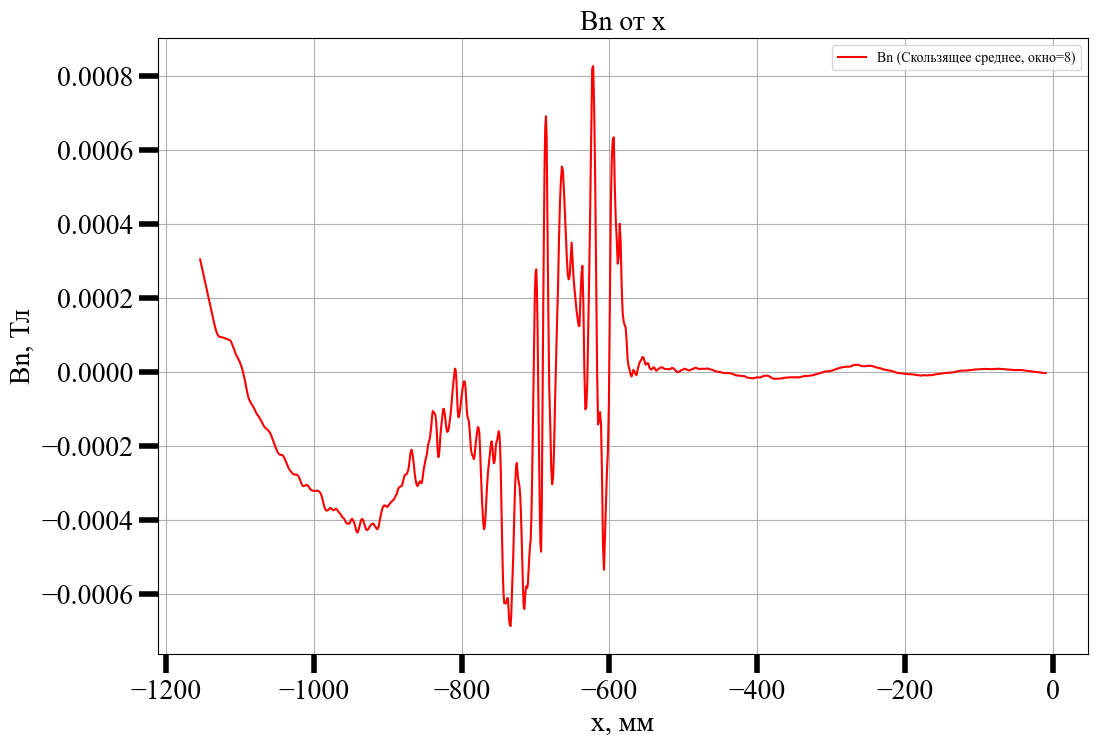

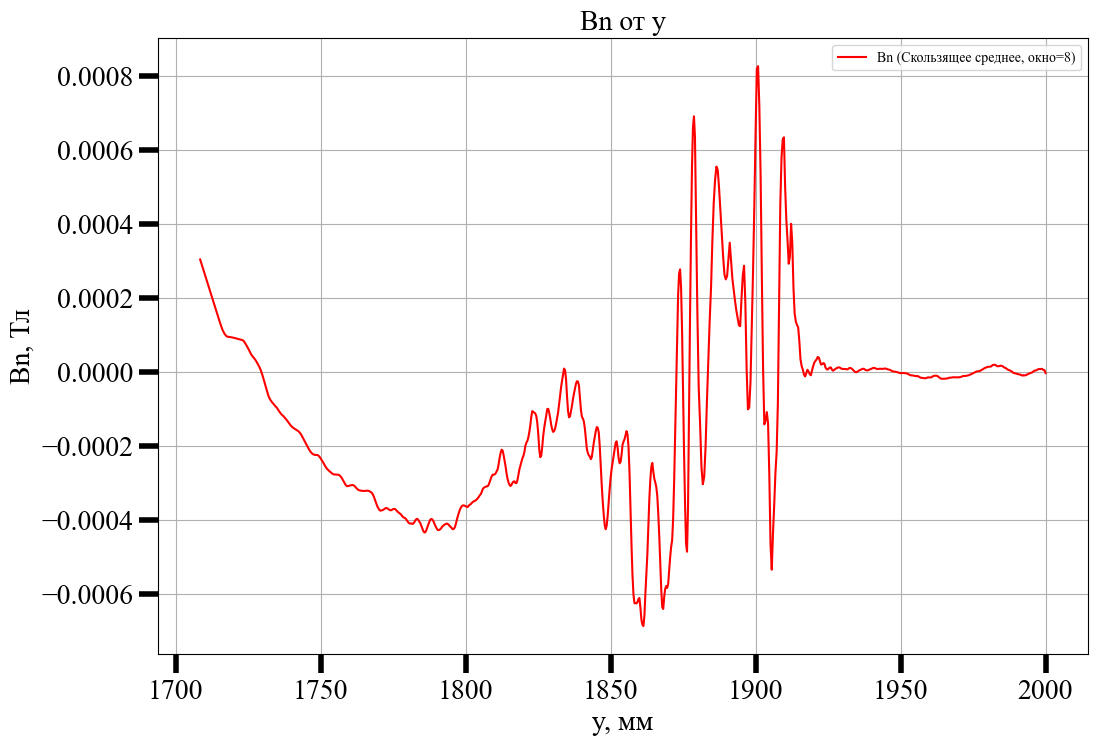

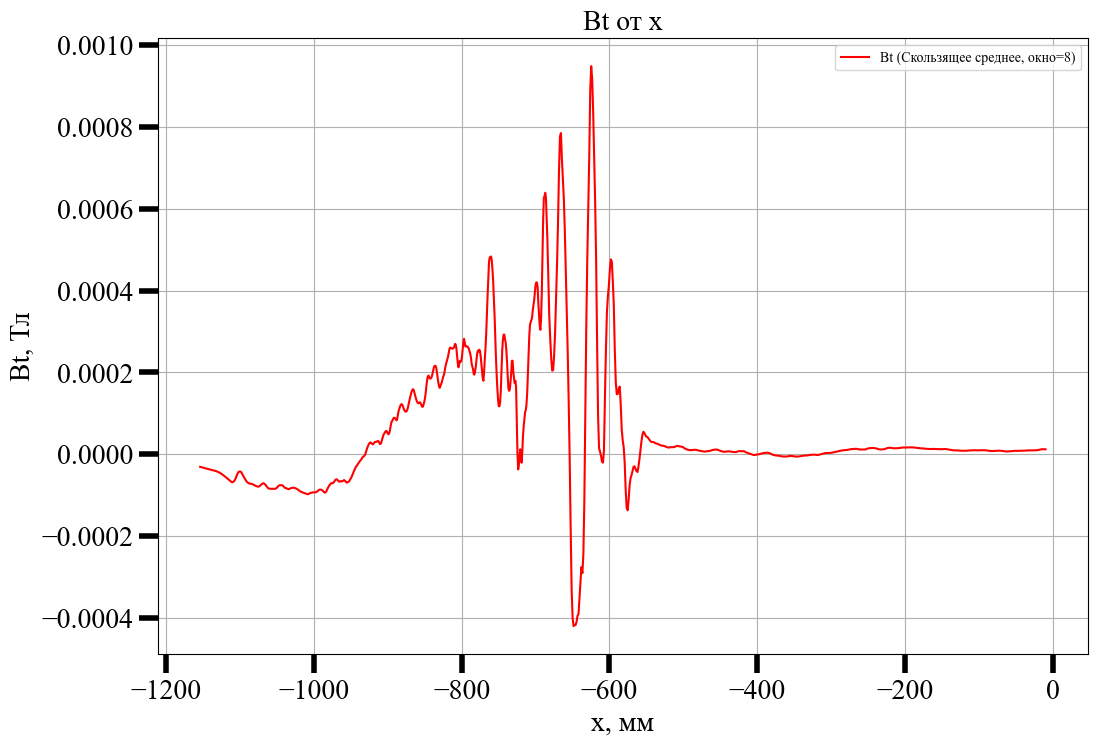

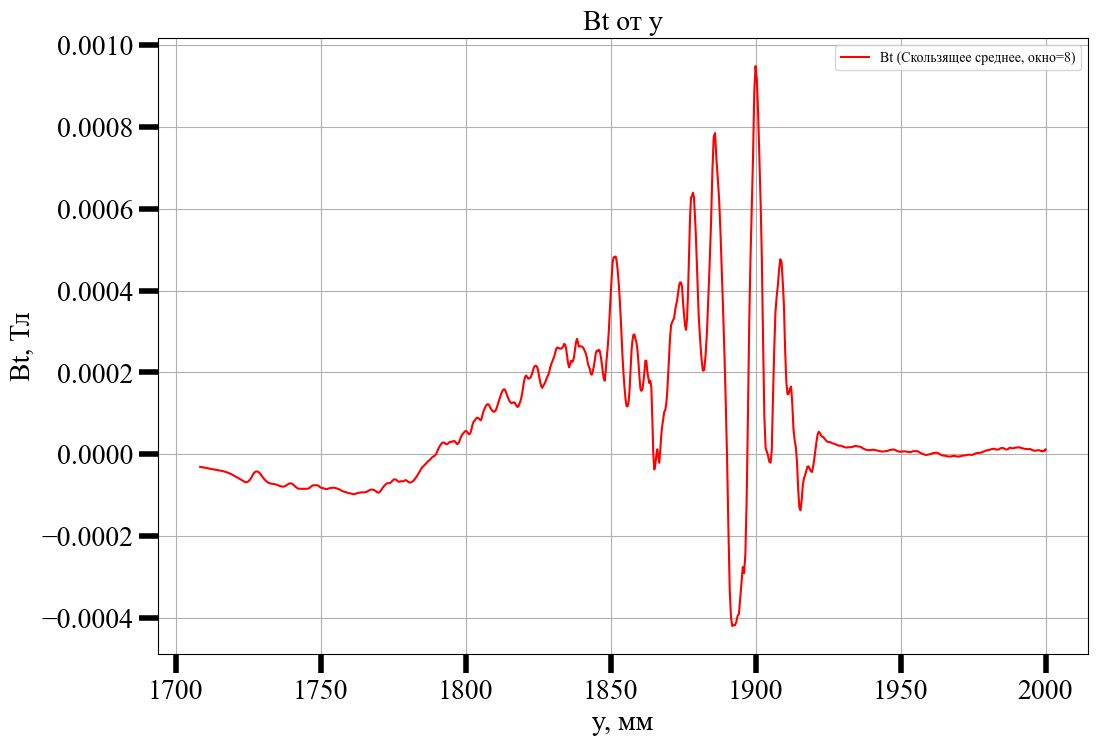

In [219]:
process_and_plot(
    file_kriv='406_m_model_2_magnets_SP184_and_TM1_kriv_drygaya.table',
    file_priam='406_m_model_2_magnets_SP184_and_TM1_priam_drygaya.table',
    window=8  # Можно изменить размер окна скользящего среднего
)